<a href="https://colab.research.google.com/github/priyankashinde-25/Data-Science/blob/main/AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Abstract**

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

**Fields**

The dataset contains 16 columns
Target filed: Income
-- The income is divide into two classes: <=50K and >50K
Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.


Attribute Information: **bold text**

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
Income class: >50K, <=50K


# Importing required Libraries and H20 Initialization
Automated machine learning (AutoML) is the process of automating the end-to-end process of applying machine learning to real-world problems.

H2O AutoML automates the steps like basic data processing, model training and tuning, Ensemble and stacking of various models to provide the models with the best performance so that developers can focus on other steps like data collection, feature engineering and deployment of model.

We are initializing H2O in the following steps.

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=ed706ac76ab9ae02e8adf317cc4964e3df2c52e68c641fc57a1e92b11c5160fa
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


In [ ]:
min_mem_size=6
run_time=222

In [ ]:
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

6


In [ ]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)
#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:12416..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmps5hc0xp6
  JVM stdout: /tmp/tmps5hc0xp6/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmps5hc0xp6/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:12416
Connecting to H2O server at http://127.0.0.1:12416 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 29 days
H2O_cluster_name:           H2O_from_python_unknownUser_0ae571
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:12416
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
ddf = pd.read_csv(
    "https://raw.githubusercontent.com/priyankashinde-25/Data-Science/main/adult.csv"
)  # Reading CSV file into Pandas DataFrame


In [ ]:
ddf.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [ ]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
mapping = {'<=50K': 50001, '>50K': 49000}
ddf['income'] = ddf['income'].map(mapping)

In [ ]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [ ]:
ddf['workclass']= ddf['workclass'].astype("category").cat.codes
ddf['education'] = ddf['education'].astype("category").cat.codes
ddf['marital-status'] = ddf['marital-status'].astype("category").cat.codes
ddf['occupation'] = ddf['occupation'].astype("category").cat.codes
ddf['relationship'] = ddf['relationship'].astype("category").cat.codes
ddf['race'] = ddf['race'].astype("category").cat.codes
ddf['gender'] = ddf['gender'].astype("category").cat.codes
ddf['native-country'] = ddf['native-country'].astype("category").cat.codes

In [ ]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  int8 
 2   fnlwgt           48842 non-null  int64
 3   education        48842 non-null  int8 
 4   educational-num  48842 non-null  int64
 5   marital-status   48842 non-null  int8 
 6   occupation       48842 non-null  int8 
 7   relationship     48842 non-null  int8 
 8   race             48842 non-null  int8 
 9   gender           48842 non-null  int8 
 10  capital-gain     48842 non-null  int64
 11  capital-loss     48842 non-null  int64
 12  hours-per-week   48842 non-null  int64
 13  native-country   48842 non-null  int8 
 14  income           48842 non-null  int64
dtypes: int64(7), int8(8)
memory usage: 3.0 MB


**Importing Data**

Once H2O is initialized, in the below code we are importing the data into a h2o dataframe.

In [ ]:
df = h2o.H2OFrame(
    ddf
)  # Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df.types

{'age': 'int',
 'workclass': 'int',
 'fnlwgt': 'int',
 'education': 'int',
 'educational-num': 'int',
 'marital-status': 'int',
 'occupation': 'int',
 'relationship': 'int',
 'race': 'int',
 'gender': 'int',
 'capital-gain': 'int',
 'capital-loss': 'int',
 'hours-per-week': 'int',
 'native-country': 'int',
 'income': 'int'}

In [ ]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df.split_frame([pct_rows])

In [ ]:
print(df_train.shape)
print(df_test.shape)

(39073, 15)
(9769, 15)


In [ ]:
df_train.head()

age    workclass    fnlwgt    education    educational-num    marital-status    occupation    relationship    race    gender    capital-gain    capital-loss    hours-per-week    native-country    income
-----  -----------  --------  -----------  -----------------  ----------------  ------------  --------------  ------  --------  --------------  --------------  ----------------  ----------------  --------
   38            4     89814           11                  9                 2             5               0       4         1               0               0                50                39     50001
   28            2    336951            7                 12                 2            11               0       4         1               0               0                40                39     49000
   44            4    160323           15                 10                 2             7               0       2         1            7688               0                40                39     49000
   18            0    103497           15                 10                 4             0               3       4         0               0               0                30                39     50001
   34            4    198693            0                  6                 4             8               1       4         1               0               0                30                39     50001
   29            0    227026           11                  9                 4             0               4       2         1               0               0                40                39     50001
   36            1    212465            9                 13                 2             1               0       4         1               0               0                40                39     50001
   26            4     82091           11                  9                 4             1               1       4         0               0               0                39                39     50001
   58            0    299831           11                  9                 2             0               0       4         1               0               0                35                39     50001
   48            4    279724           11                  9                 2             7               0       4         1            3103               0                48                39     49000
[10 rows x 15 columns]

In [ ]:
X = df.columns
print(X)

['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [ ]:
# Set target and predictor variables
y = "income"
X.remove(y)  # Removing the result frm our predictors data
print(X)

['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


**H20 AutoML Execution**

Run AutoML.

The max_runtime_secs argument provides a way to limit the AutoML run by time..

In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [ ]:
aml.train(x=X, y=y, training_frame=df_train)  # Trainig the dataset on different models

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_3_AutoML_1_20240219_23153


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    34                 34                          58607                  8            8            8             96            188           132.647

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 85535.1268598938
RMSE: 292.46388983923094
MAE: 187.99079007562767
RMSLE: 0.0059094768679974225
Mean Residual Deviance: 85535.1268598938

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 91358.73879722446
RMSE: 302.25608148923067
MAE: 194.13213081302294
RMSLE: 0.006106703216845181
Mean Residual Deviance: 91358.73879722446

Cross-Validation Metrics Summary: 
                        mean        sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ----------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     194.132     3.80616     198.219       195.226       195.319       193.978       187.918
mean_residual_deviance  91358.7     843.125     92568.5       91387.1       91574.9       91002.1       90260.9
mse                     91358.7     843.125     92568.5       91387.1       91574.9       91002.1       90260.9
r2                      0.498904    0.00759644  0.495785      0.488105      0.498838      0.50772       0.504075
residual_deviance       91358.7     843.125     92568.5       91387.1       91574.9       91002.1       90260.9
rmse                    302.253     1.3942      304.251       302.303       302.613       301.666       300.435
rmsle                   0.00610665  2.8826e-05  0.00614819    0.00610732    0.00611374    0.00609487    0.00606911

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-02-19 02:34:49  14.816 sec  0                  427.033          364.35          182357
    2024-02-19 02:34:50  15.314 sec  5                  364.906          303.969         133156
    2024-02-19 02:34:50  15.830 sec  10                 329.125          259.58          108323
    2024-02-19 02:34:51  16.255 sec  15                 312.236          232.051         97491.3
    2024-02-19 02:34:51  16.646 sec  20                 303.305          213.38          91994.1
    2024-02-19 02:34:52  17.036 sec  25                 297.838          200.82          88707.6
    2024-02-19 02:34:52  17.313 sec  30                 294.316          192.49          86622.2
    2024-02-19 02:34:52  17.517 sec  34                 292.464          187.991         85535.1

Variable Importances: 
variable         relative_importance    scaled_importance    percentage
---------------  ---------------------  -------------------  ------------
capital-gain     4.30365e+09            1                    0.243803
relationship     4.25985e+09            0.989824             0.241322
educational-num  2.27111e+09            0.527717             0.128659
marital-status   1.74638e+09            0.405792             0.0989332
age              1.28806e+09            0.299295             0.0729689
capital-loss     1.11037e+09            0.258007             0.0629029
education        8.02845e+08            0.18655              0.0454814
hours-per-week   6.56612e+08            0.152571             0.0371973
occupation       5.67669e+08            0.131904             0.0321586
workclass        2.69764e+08            0.0626826            0.0152822
fnlwgt           2.01219e+08            0

**Interpreting the above results**

MAE: The mean absolute error (MAE) is the average absolute difference between the target values and the predicted values. This metric ranges from zero to infinity; a lower value indicates a higher quality model.

RMSE: The root-mean-square error metric is a frequently used measure of the differences between the values predicted by a model or an estimator and the values observed. This metric ranges from zero to infinity; a lower value indicates a higher quality model.

RMSLE: The root-mean-squared logarithmic error metric is similar to RMSE, except that it uses the natural logarithm of the predicted and actual values plus 1. RMSLE penalizes under-prediction more heavily than over-prediction. It can also be a good metric when you don't want to penalize differences for large prediction values more heavily than for small prediction values. This metric ranges from zero to infinity; a lower value indicates a higher quality model. The RMSLE evaluation metric is returned only if all label and predicted values are non-negative.

r^2: r squared (r^2) is the square of the Pearson correlation coefficient between the labels and predicted values. This metric ranges between zero and one; a higher value indicates a higher quality model.

MAPE: Mean absolute percentage error (MAPE) is the average absolute percentage difference between the labels and the predicted values. This metric ranges between zero and infinity; a lower value indicates a higher quality model.

K-fold cross-validation is used to validate a model internally, i.e., estimate the model performance without having to sacrifice a validation split.

Next, we will view the AutoML Leaderboard. Since we specified a leaderboard_frame in the h2o.automl() function for scoring and ranking the models, the AutoML leaderboard uses the performance on this data to rank the models.

A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric. In the case of regression, the default ranking metric is mean residual deviance.

In [ ]:
print(
    aml.leaderboard
)  # Leaderboard showing the performance of different models on the dataset.

model_id                                   rmse       mse      mae       rmsle    mean_residual_deviance
GBM_3_AutoML_1_20240219_23153           302.256   91358.7  194.132  0.0061067                    91358.7
GBM_1_AutoML_1_20240219_23153           303.039   91832.8  191.214  0.0061218                    91832.8
GBM_4_AutoML_1_20240219_23153           304.01    92421.9  197.331  0.00614218                   92421.9
GBM_2_AutoML_1_20240219_23153           304.923   92978.3  200.132  0.00616085                   92978.3
XGBoost_2_AutoML_1_20240219_23153       308.409   95116.2  196.908  0.0062298                    95116.2
DRF_1_AutoML_1_20240219_23153           320.872  102959    192.642  0.00648047                  102959
XGBoost_1_AutoML_1_20240219_23153       321.567  103406    208.859  0.00649435                  103406
GBM_5_AutoML_1_20240219_23153           323.518  104664    243.085  0.00653863                  104664
DeepLearning_1_AutoML_1_20240219_23153  337.061  113610    24

**Analysing relation between all variables**

When all independent variables were plotted against 'price' variable it is observed that for'Landsize' and 'BuildingArea' roughly a linear line is obtained. So it can be concluded from this plot that variables Landsize and BuildingArea have linear relation with Price.

VIF stands for Variance Inflation Factor.It signifies multicollinearity among set of different independent variable. A value greater than 10 means that the independent variable is highly correlated with some other variable. Will calculate VIF value for all variables to check the dependency and then will drop the variables with high VIF value.

In [ ]:
import h2o
from h2o.frame import H2OFrame

# Example H2OFrame
# Assuming df is your H2OFrame containing predictor variables

# Drop rows with missing values
df = df.na_omit()

# Convert to pandas DataFrame to perform isnull() check
# Alternatively, you can use df.columns_na(), which provides a list of columns containing NA values
pandas_df = df.as_data_frame()
has_null = pandas_df.isnull().values.any()

if has_null:
    print("Missing values still exist after dropping rows")
else:
    print("No missing values remain")

# Now you can proceed with calculating VIF or other operations on the H2OFrame


Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
No missing values remain


In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import h2o

# Assuming df is your H2OFrame containing predictor variables
# Convert H2OFrame to pandas DataFrame
df_pd = df.as_data_frame()

# Indicate which variables to compute VIF
Multic = df_pd[['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
                'marital-status', 'occupation', 'relationship', 'race', 'gender',
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]

# Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]

# Print VIF values
print(vif)


Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
          variables        VIF
0               age   8.478585
1         workclass   8.446382
2            fnlwgt   4.030610
3         education   9.177542
4   educational-num  18.355128
5    marital-status   3.987780
6        occupation   3.719689
7      relationship   2.608301
8              race  17.647920
9            gender   4.403374
10     capital-gain   1.045300
11     capital-loss   1.061696
12   hours-per-week  12.078859
13   native-country  19.956125


VIF for 'ecucational-num','race','hours-per-week','native-country' is greater than 10.'Rooms','
Ordinary least squares (OLS) regression is a statistical method of analysis used for multivariate model that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable.


In [60]:
missing_values = df_pd['educational-num'].isnull().sum()

In [ ]:
# Check the data type of the "educational-num" variable
data_type = df_pd['educational-num'].dtype
print("Data type of 'educational-num':", data_type)

# Print unique values of the "educational-num" variable
unique_values = df_pd['educational-num'].unique()
print("Unique values of 'educational-num':", unique_values)


Data type of 'educational-num': int64
Unique values of 'educational-num': [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_pd['educational-num_scaled'] = scaler.fit_transform(df_pd[['educational-num']])

In [ ]:
print(df_pd.head(10))

   age  workclass  fnlwgt  education  educational-num  marital-status  \
0   25          4  226802          1                7               4   
1   38          4   89814         11                9               2   
2   28          2  336951          7               12               2   
3   44          4  160323         15               10               2   
4   18          0  103497         15               10               4   
5   34          4  198693          0                6               4   
6   29          0  227026         11                9               4   
7   63          6  104626         14               15               2   
8   24          4  369667         15               10               4   
9   55          4  104996          5                4               2   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           7             3     2       1             0             0   
1           5             0     4       1         

In [ ]:
import statsmodels.api as sm
import pandas as pd
import h2o

# Assuming df is your H2OFrame containing predictor variables and target variable
# Convert H2OFrame to pandas DataFrame
df_pd = df.as_data_frame()

# Define predictor variables (X) and target variable (y)
X = df_pd[['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]
y = df_pd['income']

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Fit OLS regression model
model = sm.OLS(y, X)
results = model.fit()

# Print summary of the regression results
print(results.summary())


Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     1221.
Date:                Mon, 19 Feb 2024   Prob (F-statistic):               0.00
Time:                        02:38:03   Log-Likelihood:            -3.5781e+05
No. Observations:               48842   AIC:                         7.156e+05
Df Residuals:                   48827   BIC:                         7.158e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

P-values for all the variables are less than 0.05 and the accuracy is 76.4%.

In [47]:
#Calculating correlation matrix for all variables
df_pd.corr()

age  workclass    fnlwgt  education  educational-num  \
age              1.000000   0.017526 -0.076628  -0.015058         0.030940   
workclass        0.017526   1.000000 -0.016546   0.017187         0.055918   
fnlwgt          -0.076628  -0.016546  1.000000  -0.022570        -0.038761   
education       -0.015058   0.017187 -0.022570   1.000000         0.359668   
educational-num  0.030940   0.055918 -0.038761   0.359668         1.000000   
marital-status  -0.263978  -0.068441  0.029851  -0.037417        -0.069992   
occupation      -0.014259   0.260005  0.000860  -0.020972         0.112265   
relationship    -0.263383  -0.092365  0.009092  -0.010758        -0.090534   
race             0.028421   0.052932 -0.027062   0.013250         0.029239   
gender           0.088120   0.091223  0.027739  -0.027041         0.009328   
capital-gain     0.077229   0.036044 -0.003706   0.028928         0.125146   
capital-loss     0.056944   0.010880 -0.004366   0.017638         0.080972   
hours-per-week   0.071558   0.141283 -0.013519   0.057659         0.143689   
native-country  -0.002861  -0.008631 -0.048680   0.061469         0.049107   
income          -0.230369  -0.052674  0.006339  -0.080091        -0.332613   

                 marital-status  occupation  relationship      race    gender  \
age                   -0.263978   -0.014259     -0.263383  0.028421  0.088120   
workclass             -0.068441    0.260005     -0.092365  0.052932  0.091223   
fnlwgt                 0.029851    0.000860      0.009092 -0.027062  0.027739   
education             -0.037417   -0.020972     -0.010758  0.013250 -0.027041   
educational-num       -0.069992    0.112265     -0.090534  0.029239  0.009328   
marital-status         1.000000   -0.017179      0.187800 -0.070104 -0.127479   
occupation            -0.017179    1.000000     -0.076356  0.005671  0.075081   
relationship           0.187800   -0.076356      1.000000 -0.117041 -0.579797   
race                  -0.070104    0.005671     -0.117041  1.000000  0.086734   
gender                -0.127479    0.075081     -0.579797  0.086734  1.000000   
capital-gain          -0.043969    0.024163     -0.056510  0.011581  0.047094   
capital-loss          -0.033872    0.017180     -0.057201  0.018595  0.045480   
hours-per-week        -0.185567    0.079986     -0.250400  0.039694  0.228560   
native-country        -0.021375   -0.013424     -0.003962  0.138231 -0.009780   
income                 0.199072   -0.076722      0.253214 -0.070934 -0.214628   

                 capital-gain  capital-loss  hours-per-week  native-country  \
age                  0.077229      0.056944        0.071558       -0.002861   
workclass            0.036044      0.010880        0.141283       -0.008631   
fnlwgt              -0.003706     -0.004366       -0.013519       -0.048680   
education            0.028928      0.017638        0.057659        0.061469   
educational-num      0.125146      0.080972        0.143689        0.049107   
marital-status      -0.043969     -0.033872       -0.185567       -0.021375   
occupation           0.024163      0.017180        0.079986       -0.013424   
relationship        -0.056510     -0.057201       -0.250400       -0.003962   
race                 0.011581      0.018595        0.039694        0.138231   
gender               0.047094      0.045480        0.228560       -0.009780   
capital-gain         1.000000     -0.031441        0.082157       -0.001816   
capital-loss        -0.031441      1.000000        0.054467        0.003449   
hours-per-week       0.082157      0.054467        1.000000        0.000705   
native-country      -0.001816      0.003449        0.000705        1.000000   
income              -0.223013     -0.147554       -0.227687       -0.012210   

                   income  
age             -0.230369  
workclass       -0.052674  
fnlwgt           0.006339  
education       -0.080091  
educational-num -0.332613  
marital-status   0.199072  
occupation     

Text(0.5, 1.0, 'Variable Correlation')

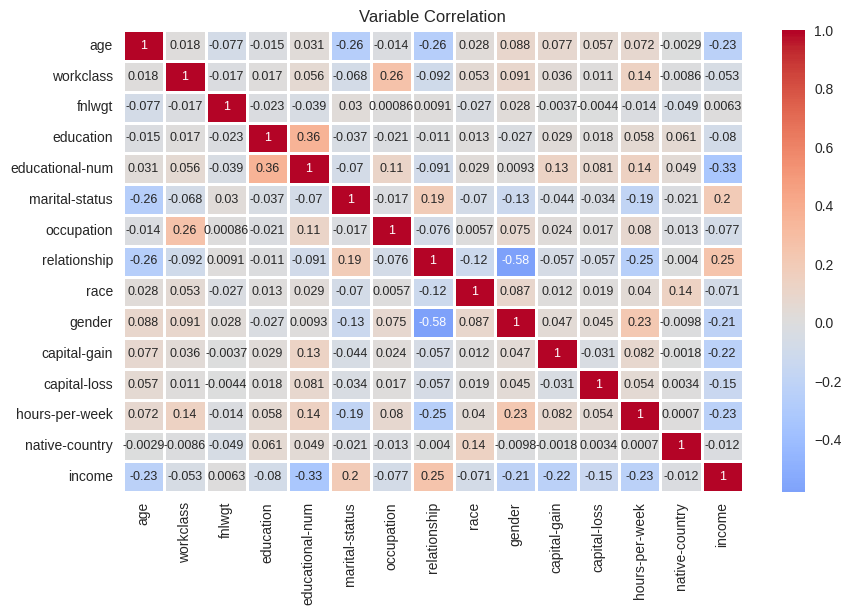

In [50]:
#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(df_pd.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

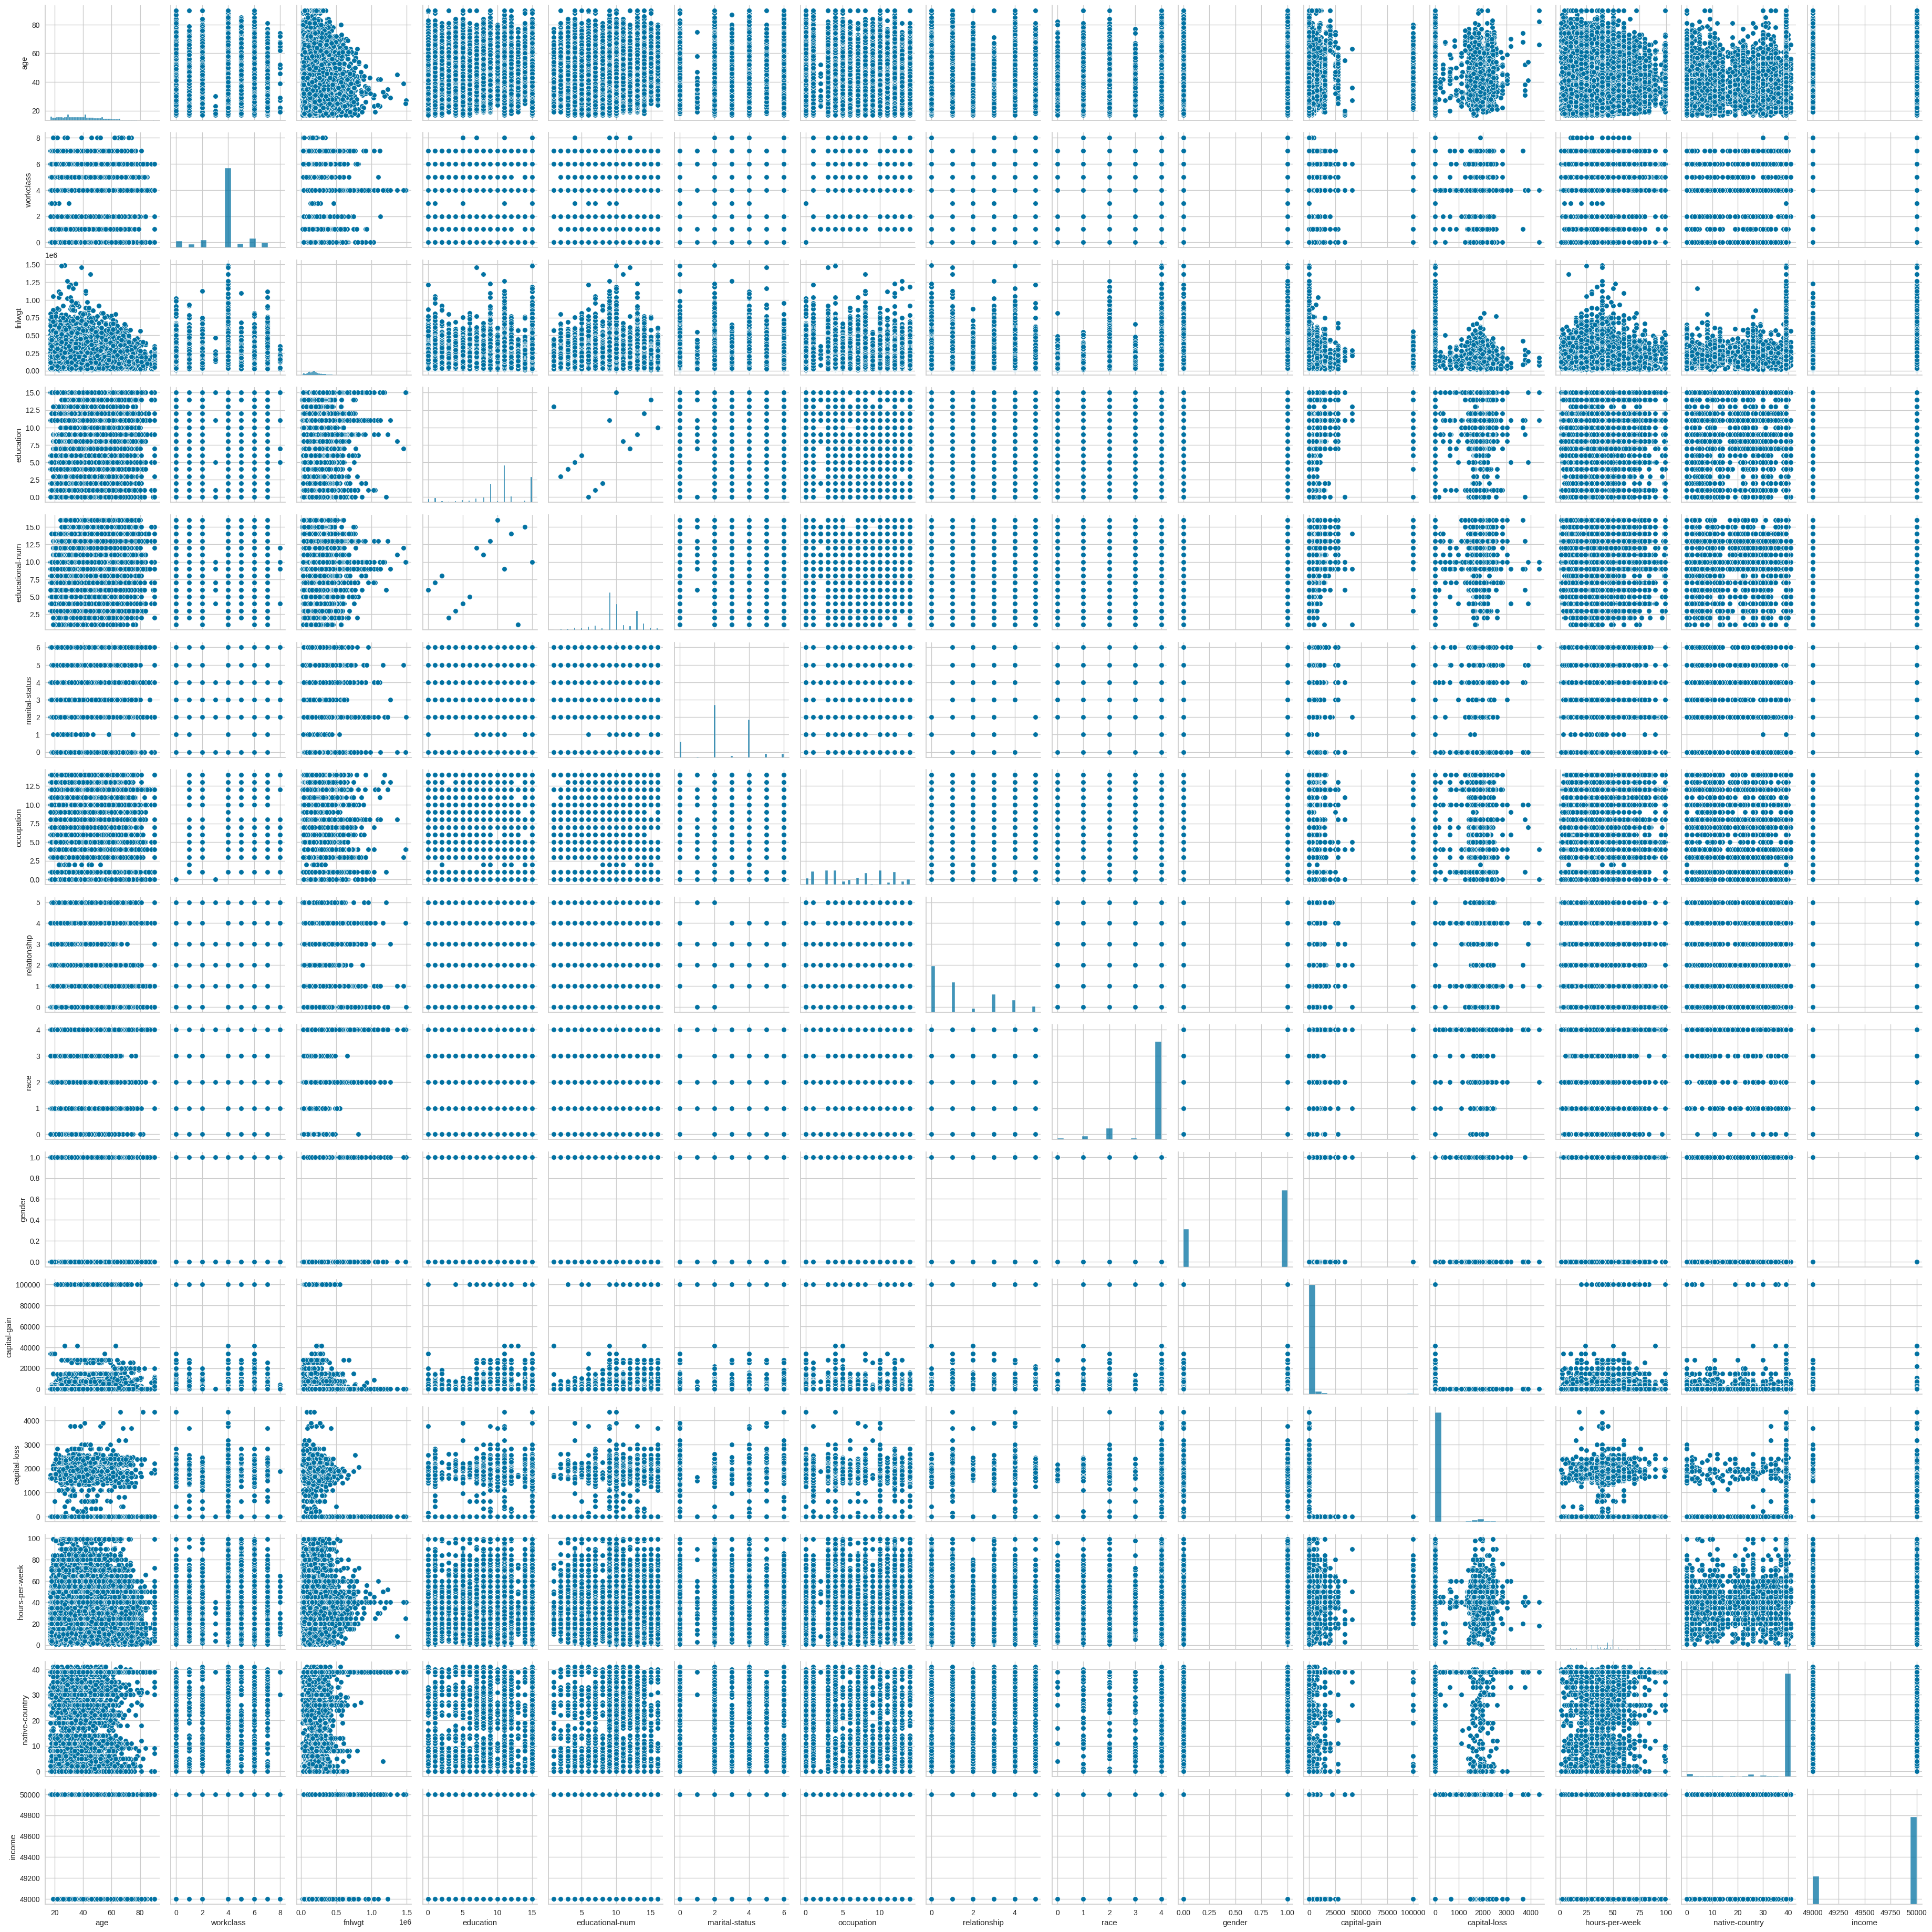

In [51]:
sns.pairplot(df_pd)

In [ ]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


{'GBM_3_AutoML_1_20240219_23153': 0, 'GLM_1_AutoML_1_20240219_23153': 10}

In [ ]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

0


In [ ]:
best_model.algo

'gbm'

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

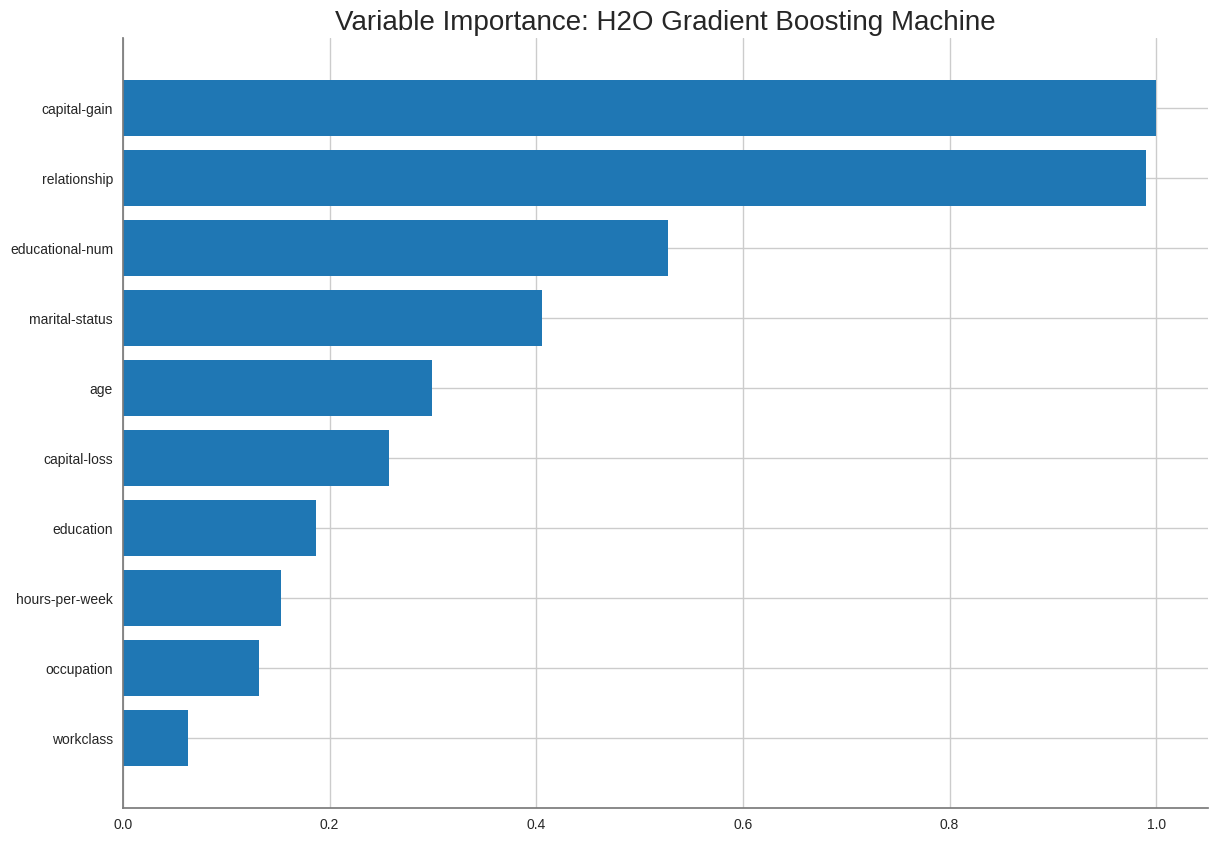

<Figure size 800x550 with 0 Axes>

In [ ]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

10
glm


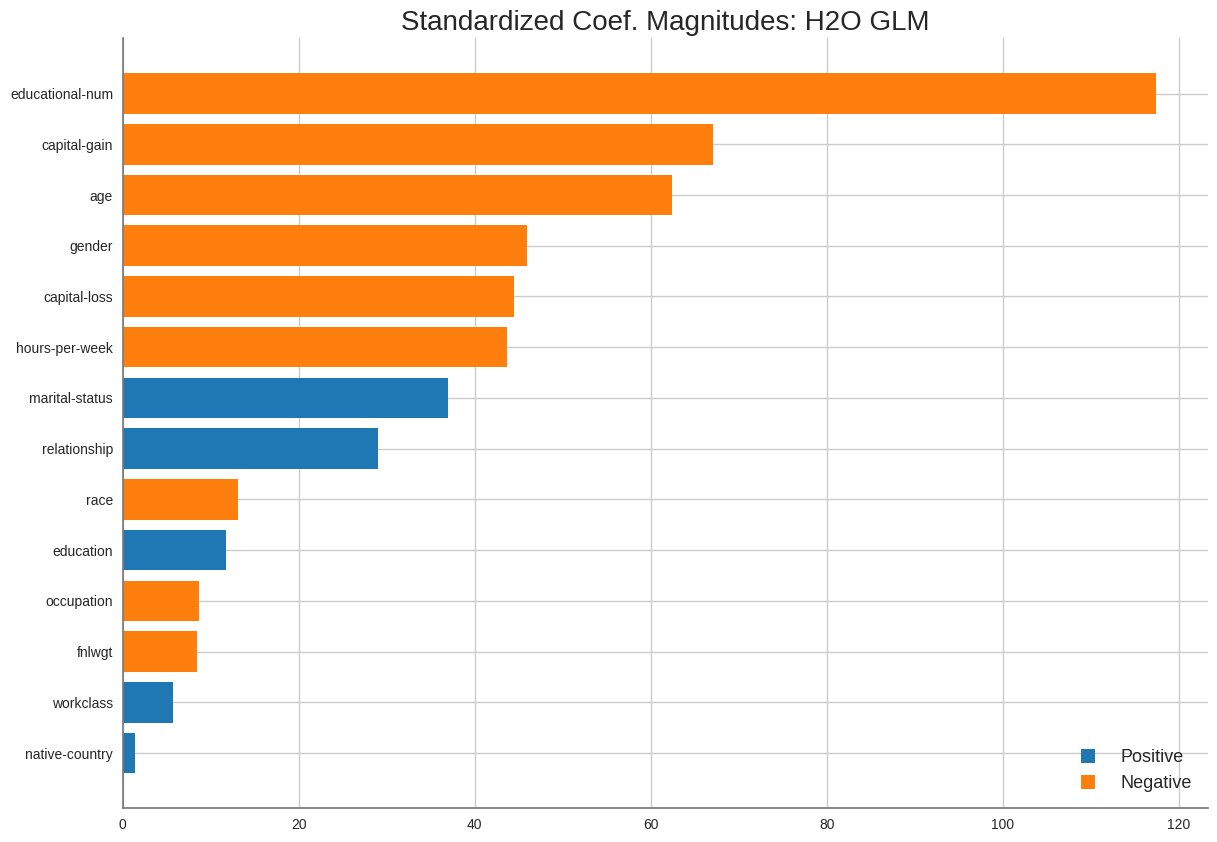

In [ ]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

In [ ]:
print(best_model.rmse(train=True))

292.46388983923094


In [ ]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [ ]:
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 89201.9117967251,
 'rmse': 298.6668910286594,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

In [ ]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
           predict
0     49996.011247
1     49263.298588
2     49995.232205
3     49953.936536
4     49105.694974
...            ...
9764  49731.042394
9765  49976.715826
9766  49959.310799
9767  49818.200126
9768  49969.053918

[9769 rows x 1 columns]


In [58]:
print(X)

       const  age  workclass  fnlwgt  education  educational-num  \
0        1.0   25          4  226802          1                7   
1        1.0   38          4   89814         11                9   
2        1.0   28          2  336951          7               12   
3        1.0   44          4  160323         15               10   
4        1.0   18          0  103497         15               10   
...      ...  ...        ...     ...        ...              ...   
48837    1.0   27          4  257302          7               12   
48838    1.0   40          4  154374         11                9   
48839    1.0   58          4  151910         11                9   
48840    1.0   22          4  201490         11                9   
48841    1.0   52          5  287927         11                9   

       marital-status  occupation  relationship  race  gender  capital-gain  \
0                   4           7             3     2       1             0   
1                   2    

**Regularization**

In this Section, we will be using the GLM model to check if regularization is helping us to improve the accuracy and reduce overfitting.

Ridge and Lasso are regularization techniques used in linear regression to prevent overfitting and improve the model's generalization ability.

Ridge regularization adds a penalty term to the least-squares objective function of the linear regression model. This penalty term is proportional to the square of the magnitude of the coefficients of the model, which shrinks the coefficients towards zero. The strength of the penalty is controlled by a hyperparameter called the regularization parameter, which needs to be tuned to achieve the best performance. Ridge regularization is particularly useful when there are many input variables that are correlated with each other, as it can help to reduce the variance of the model by reducing the effect of these correlated variables.

Lasso regularization is similar to Ridge regularization, but instead of adding a penalty term proportional to the square of the coefficients, it adds a penalty term proportional to the absolute value of the coefficients. This penalty term can set some coefficients to exactly zero, which makes Lasso regularization a useful method for feature selection. By setting some coefficients to zero, Lasso can effectively remove irrelevant variables from the model, which can lead to a simpler and more interpretable model.

The main difference between Ridge and Lasso regularization is the type of penalty function used. Ridge uses L2 regularization, while Lasso uses L1 regularization. L2 regularization tends to distribute the penalty evenly across all coefficients, while L1 regularization tends to concentrate the penalty on a smaller subset of the most important coefficients. Which method to use depends on the specific problem and the properties of the input variables.

In [59]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

adult_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
adult_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
adult_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
adult_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

This code is creating two generalized linear regression models using the H2O machine learning platform with different regularization methods: Ridge and Lasso.

The first model, "wine_glm_regularization_ridge," is using Ridge regularization. The "family" argument is set to "gaussian," which means that the response variable is continuous and the model is using a normal (Gaussian) error distribution. The "alpha" argument is set to 0, which means that the model is using Ridge regularization. The "nfolds" argument is set to 5, which means that the model is using 5-fold cross-validation to evaluate the performance of the model.
The second model, "wine_glm_regularization_lasso," is using Lasso regularization. The "family" and "nfolds" arguments are the same as in the Ridge model, but the "alpha" argument is set to 1, which means that the model is using Lasso regularization.
This code creates a generalized linear regression model using H2O with the option of performing lambda search for L1 and L2 regularization.

In [63]:
# Assuming df_train is your H2OFrame containing training data
# Assuming X contains the names of predictor variables as a list of strings
# Assuming 'income' is the name of your target variable column

# Convert H2OFrame to pandas DataFrame
df_train_pd = df_train.as_data_frame()

# Get the list of predictor variable names (excluding the target variable)
X = df_train_pd.columns.tolist()
X.remove('income')  # Remove the target variable column from the list of predictors

# Train the GLM model
adult_glm.train(x=X, y='income', training_frame=df_train)



Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708309841794_20


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              14                            14                             1                       py_2_sid_9c20

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 135106.65131787542
RMSE: 367.5685668251237
MAE: 294.5352331780227
RMSLE: 0.007425492514364661
Mean Residual Deviance: 135106.65131787542
R^2: 0.25911061328216534
Null degrees of freedom: 39072
Residual degrees of freedom: 39058
Null deviance: 7125250113.714156
Residual deviance: 5279022186.943347
AIC: 572517.7499142253

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 135207.69625339718
RMSE: 367.70599159300787
MAE: 294.65008784453437
RMSLE: 0.007428267844104609
Mean Residual Deviance: 135207.69625339718
R^2: 0.2585565093977198
Null degrees of freedom: 39072
Residual degrees of freedom: 39058
Null deviance: 7125535336.261786
Residual deviance: 5282970315.708988
AIC: 572546.9613044827

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     294.658      2.58355      292.246       292.622       297.048       297.797       293.576
mean_residual_deviance  135224       2118.6       133423        134247        138127        136792        133529
mse                     135224       2118.6       133423        134247        138127        136792        133529
null_deviance           1.42511e+09  2.84646e+07  1.39454e+09   1.40716e+09   1.43234e+09   1.42251e+09   1.46899e+09
r2                      0.258514     0.00515291   0.265394      0.257809      0.256692      0.251564      0.261114
residual_deviance       1.05659e+09  2.31026e+07  1.02442e+09   1.04431e+09   1.06427e+09   1.06465e+09   1.08532e+09
rmse                    367.719      2.87582      365.272       366.397       371.654       369.854       365.416
rmsle                   0.00742852   5.84055e-05  0.00737914    0.00740172    0.00750888    0.00747128    0.0073816

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse      training_deviance    training_mae       training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  -----------------  -------------------  -----------------  -------------------
    2024-02-19 06:00:09  0.000 sec   0             7125250113.706956          182357.38524574402
    2024-02-19 06:00:09  0.474 sec   1                                                            367.5685668251237  135106.65131787542   294.5352331780227  0.25911061328216534

Variable Importances: 
variable         relative_importance    scaled_importance    percentage
---------------  ---------------------  -------------------  ------------
educational-num  119.251                1                    0.237712
capital-gain     67.7303                0.567964             0.135012
age              63.1868                0.529864             0.125955
gender           46.6946                0.391566             0.0930801
capital-loss     44.9027                0.37654              0.0895081
hours-per-week   43.9034                0.36816              0.0875162
marital-status   37.1425                0.311465             0.0740391
relationship     28.5118                0.239091             0.0568349
race             13.2205                0.110863             0

**Ridge Regularization**

In [ ]:
adult_glm_regularization_ridge.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708241334607_24


GLM Model: summary
    family    link      regularization             number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.1429 )  14                            14                             1                       py_2_sid_ab2b

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 135685.68583798988
RMSE: 368.3553798141
MAE: 295.96273983370037
RMSLE: 0.007442030402702443
Mean Residual Deviance: 135685.68583798988
R^2: 0.2556779926875886
Null degrees of freedom: 39213
Residual degrees of freedom: 39199
Null deviance: 7148490078.467326
Residual deviance: 5320778484.450935
AIC: 574751.3418013741

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 135988.1819302305
RMSE: 368.7657548230726
MAE: 296.54327238297566
RMSLE: 0.007450440054974322
Mean Residual Deviance: 135988.1819302305
R^2: 0.25401860984856517
Null degrees of freedom: 39213
Residual degrees of freedom: 39199
Null deviance: 7148777964.489363
Residual deviance: 5332640566.212059
AIC: 574838.6677319885

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     296.542      1.43926      297.148       295.246       298.763       296.04        295.514
mean_residual_deviance  135987       1787.75      137112        133996        138418        134748        135660
mse                     135987       1787.75      137112        133996        138418        134748        135660
null_deviance           1.42976e+09  2.5194e+07   1.46762e+09   1.41924e+09   1.4423e+09    1.41438e+09   1.40524e+09
r2                      0.253955     0.00333204   0.255599      0.257647      0.25146       0.255517      0.249549
residual_deviance       1.06653e+09  1.826e+07    1.09237e+09   1.05347e+09   1.07939e+09   1.05292e+09   1.05449e+09
rmse                    368.758      2.42198      370.286       366.054       372.046       367.081       368.321
rmsle                   0.00745027   4.95177e-05  0.00748163    0.00739501    0.00751746    0.00741597    0.00744129

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse    training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ---------------  -------------------  ------------------  ------------------
    2024-02-18 08:08:38  0.000 sec   0             7148490078.469015          182294.33565739315
    2024-02-18 08:08:38  0.046 sec   1                                                            368.3553798141   135685.68583798988   295.96273983370037  0.2556779926875886

Variable Importances: 
variable         relative_importance    scaled_importance    percentage
---------------  ---------------------  -------------------  ------------
educational-num  105.913                1                    0.236139
capital-gain     61.5074                0.580735             0.137134
age              56.2506                0.531102             0.125414
hours-per-week   41.3087                0.390024             0.0921001
gender           40.9444                0.386584             0.0912878
capital-loss     39.344                 0.371475             0.0877198
marital-status   34.745                 0.328052             0.077466
relationship     29.2319                0.275999             0.0651743
race             12.2841                0.115

The regularization appears to have helped in reducing the cross-validation metrics.

The mean squared error (Improved by 0.468%),
root mean squared error (Improved by 0.234%),
mean absolute error(Improved by 0.298%), and root mean squared logarithmic error are all lower in the model with regularization compared to the model without regularization. Additionally, the residual deviance and AIC are also lower in the model with regularization. The R-squared value is slightly higher in the model with regularization, which means that the regularization helped the model to better generalize to new data.

**Lasso Regularization**

In [ ]:
adult_glm_regularization_lasso.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708241334607_25


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Lasso (lambda = 0.1429 )  14                            14                             1                       py_2_sid_ab2b

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 135252.12968823683
RMSE: 367.7664064161337
MAE: 294.44186281118385
RMSLE: 0.00742951136834372
Mean Residual Deviance: 135252.12968823683
R^2: 0.2580563230300549
Null degrees of freedom: 39213
Residual degrees of freedom: 39199
Null deviance: 7148490078.467326
Residual deviance: 5303777013.59452
AIC: 574625.8407867957

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 135394.18625355547
RMSE: 367.95948996262547
MAE: 294.5969276134006
RMSLE: 0.007433437326818727
Mean Residual Deviance: 135394.18625355547
R^2: 0.25727705270985224
Null degrees of freedom: 39213
Residual degrees of freedom: 39200
Null deviance: 7149188339.595015
Residual deviance: 5309347619.746924
AIC: 574665.0060001081

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     294.589      2.853        298.294       292.312       296.201       291.275       294.86
mean_residual_deviance  135387       2820.26      138480        133565        137413        131572        135904
mse                     135387       2820.26      138480        133565        137413        131572        135904
null_deviance           1.42984e+09  3.52271e+07  1.46757e+09   1.37706e+09   1.44469e+09   1.4136e+09    1.44628e+09
r2                      0.25714      0.00712236   0.259503      0.25216       0.2498        0.267996      0.256242
residual_deviance       1.06187e+09  2.7626e+07   1.08596e+09   1.02938e+09   1.08378e+09   1.03455e+09   1.07568e+09
rmse                    367.933      3.83792      372.129       365.465       370.693       362.729       368.651
rmsle                   0.0074329    7.80684e-05  0.00751813    0.00738262    0.00748944    0.00732714    0.00744718

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse      training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  -----------------  -------------------  ------------------  ------------------
    2024-02-18 08:09:30  0.000 sec   0             7148490078.469015          182294.33565739315
    2024-02-18 08:09:30  0.032 sec   1                                                            367.7664064161337  135252.12968823683   294.44186281118385  0.2580563230300549

Variable Importances: 
variable         relative_importance    scaled_importance    percentage
---------------  ---------------------  -------------------  ------------
educational-num  122.178                1                    0.245237
capital-gain     67.7833                0.554791             0.136055
age              62.9098                0.514903             0.126273
gender           46.8981                0.383851             0.0941342
hours-per-week   43.5528                0.35647              0.0874194
capital-loss     43.2044                0.353618             0.0867202
marital-status   36.2142                0.296405             0.0726894
relationship     25.3882                0.207797             0.0509594
education        14.5188               

**Which Regularization Method Helps ?**

The Lasso regularization appears to have increased the MSE, RMSE, MAE, and RMSLE values compared to the non-regularized and Ridge regularized models, indicating worse performance. The R-squared value also decreased, indicating a worse fit to the data.

So based on these metrics, it seems that Lasso did not help in this case and performed worse than Ridge. However, it's always a good practice to try multiple regularization techniques and compare their performance using different metrics, as the optimal regularization method can depend on the specific dataset and modeling task.

Here, we can observe that after applying the ridge regularization, there is a slight improvement in the evaluation metrics on the cross validation data, hence it can be concluded that Ridge regularization helps us avoid the overfitting of model and improvements of metrics on the validation dataset.

In [ ]:
lambda_search = adult_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=df_train
)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [ ]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708241334607_26


GLM Model: summary
    family    link      regularization                                lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.06604 )  nlambda = 100, lambda.max = 285.89, lambda.min = 0.06604, lambda.1se = -1.0  14                            14                             91                      py_2_sid_ab2b

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 135281.7834996225
RMSE: 367.8067203024199
MAE: 294.717182678032
RMSLE: 0.007430481638990684
Mean Residual Deviance: 135281.7834996225
R^2: 0.2578936530750132
Null degrees of freedom: 39213
Residual degrees of freedom: 39199
Null deviance: 7148490078.467326
Residual deviance: 5304939858.154198
AIC: 574634.4374507085

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train      alpha    iterations    training_rmse      training_deviance    training_mae      training_r2
---  -------------------  ----------  -----------  --------  ------------  ------------------  -------  ------------  -----------------  -------------------  ----------------  ------------------
     2024-02-18 08:10:28  0.000 sec   1            .29E3     1             182294.33565778486  0.5
     2024-02-18 08:10:28  0.009 sec   2            .26E3     2             182266.68319748685  0.5
     2024-02-18 08:10:28  0.011 sec   3            .24E3     2             182236.39921408807  0.5
     2024-02-18 08:10:28  0.017 sec   4            .22E3     2             182203.24010716836  0.5
     2024-02-18 08:10:28  0.024 sec   5            .2E3      3             182151.3643401432   0.5
     2024-02-18 08:10:28  0.031 sec   6            .18E3     6             182046.7000457426   0.5
     2024-02-18 08:10:28  0.034 sec   7            .16E3     8             181898.52109817285  0.5
     2024-02-18 08:10:28  0.035 sec   8            .15E3     8             181725.88878533494  0.5
     2024-02-18 08:10:28  0.037 sec   9            .14E3     8             181537.6604202262   0.5
     2024-02-18 08:10:28  0.045 sec   10           .12E3     9             181332.2758652841   0.5
---  ---                  ---         ---          ---       ---           ---                 ---      ---           ---                ---                  ---               ---
     2024-02-18 08:10:28  0.239 sec   82           .15E0     15            135397.09372768653  0.5
     2024-02-18 08:10:28  0.241 sec   83           .14E0     15            135374.17384535816  0.5
     2024-02-18 08:10:28  0.243 sec   84           .13E0     15            135354.75686417797  0.5
     2024-02-18 08:10:28  0.245 sec   85           .12E0     15            135338.333043524    0.5
     2024-02-18 08:10:28  0.246 sec   86           .11E0     15            135324.46106699776  0.5
     2024-02-18 08:10:28  0.248 sec   87           .96E-1    15            135312.7602382918   0.5
     2024-02-18 08:10:28  0.250 sec   88           .87E-1    15            135302.9031416554   0.5
     2024-02-18 08:10:28  0.252 sec   89           .8E-1     15            135294.60891518334  0.5
     2024-02-18 08:10:28  0.254 sec   90           .72E-1    15            135287.63738277464  0.5
     2024-02-18 08:10:28  0.255 sec   91           .66E-1    15            135281.78350047176  0.5      91            367.8067203024199  135281.7834996225    294.717182678032  0.2578936530750132
[91 rows x 13 columns]


Variable Importances: 
variable     

Above parameters are from a lambda search, which means that the model was trained on a range of different values of the regularization parameter lambda to find the value that minimized the selected loss function. Based on the reported metrics, it seems that the optimal value of lambda resulted in a slightly improved model compared to the non-regularized model. The MSE, RMSE, and MAE all decreased slightly, indicating that the model is making slightly more accurate predictions on the training data. The R^2 value, which measures how well the model fits the data, decreased slightly, which may indicate that the model is not overfitting the training data as much. Overall, the lambda search seems to have resulted in a slightly improved model.

MSE improved from 0.4234393816333662 to 0.42185125944877285, or by 0.375%
RMSE improved from 0.6507222000465069 to 0.6493051832461667, or by 0.218%
MAE improved from 0.5049750807378458 to 0.5035142349852977, or by 0.290%
RMSLE improved from 0.09927527847388463 to 0.09893003268921823, or by 0.348%
R-squared improved from 0.358097238638058 to 0.3603008092769123, or by 0.616%

In [ ]:
coeff_table = adult_glm._model_json["output"]["coefficients_table"]

In [ ]:
coeff_table.as_data_frame()  # Z-Value and P-Value showing the significance of each attributes.

names  coefficients  std_error      z_value        p_value  \
0         Intercept  50589.331857  18.982275  2665.082695   0.000000e+00   
1               age     -4.604115   0.146016   -31.531569  1.600710e-215   
2         workclass      3.722507   1.331248     2.796255   5.172377e-03   
3            fnlwgt     -0.000075   0.000018    -4.265392   2.000188e-05   
4         education      3.797159   0.515985     7.359051   1.888460e-13   
5   educational-num    -47.612876   0.796413   -59.784151   0.000000e+00   
6    marital-status     24.052496   1.304858    18.433032   1.490421e-75   
7        occupation     -2.059822   0.458452    -4.492997   7.042816e-06   
8      relationship     15.796180   1.496567    10.554946   5.222728e-26   
9              race    -15.698388   2.242004    -7.001943   2.564916e-12   
10           gender    -99.766921   4.909082   -20.322928   2.387406e-91   
11     capital-gain     -0.009339   0.000259   -36.043250  6.702873e-280   
12     capital-loss     -0.108208   0.004676   -23.141346  1.095883e-117   
13   hours-per-week     -3.530050   0.160281   -22.024184  7.528921e-107   
14   native-country      0.132278   0.242575     0.545310   5.855436e-01   

    standardized_coefficients  
0                49761.662620  
1                  -63.005696  
2                    5.433831  
3                   -7.968394  
4                   14.715138  
5                 -122.349255  
6                   36.301103  
7                   -8.713917  
8                   25.391121  
9                  -13.256172  
10                 -46.972988  
11                 -67.896090  
12                 -43.321034  
13                 -43.640653  
14                   1.026311

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                   rmse       mse      mae       rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  -------  --------  -------  ----------  ------------------------  ------------------  -------------------------  ---------------
GBM_3_AutoML_1_20240218_73311                           299.219   89532    185.753  0.00604491                   89532                  1877                   0.018489  GBM
GBM_2_AutoML_1_20240218_73311                           299.854   89912.2  187.517  0.00605789                   89912.2                1699                   0.011826  GBM
GBM_5_AutoML_1_20240218_73311                           300.078   90046.7  190.393  0.00606251                   90046.7                1535                   0.015846  GBM
GBM_4_AutoML_1_20240218_73311                           300.381   90229    184.808  0.00606836                   90229                  1906                   0.01136   GBM
GBM_1_AutoML_1_20240218_73311                           302.882   91737.8  188.815  0.00611861                   91737.8                3948                   0.017209  GBM
XGBoost_3_AutoML_1_20240218_73311                       303.142   91895.2  196.4    0.00612415                   91895.2                1410                   0.001955  XGBoost
XGBoost_2_AutoML_1_20240218_73311                       306.301   93820.6  195.012  0.00618709                   93820.6                3706                   0.002267  XGBoost
XGBoost_grid_1_AutoML_1_20240218_73311_model_1          307.331   94452.4  196.389  0.00620809                   94452.4                1534                   0.003462  XGBoost
GBM_grid_1_AutoML_1_20240218_73311_model_1              310.741   96560    217.168  0.00627895                   96560                  1062                   0.007992  GBM
XRT_1_AutoML_1_20240218_73311                           311.587   97086.7  194.13   0.00629353                   97086.7                1704                   0.008543  DRF
DRF_1_AutoML_1_20240218_73311                           312.679   97768    190.85   0.00631566                   97768                  3718                   0.011279  DRF
XGBoost_1_AutoML_1_20240218_73311                       319.572  102126    206.353  0.00645421                  102126                  6294                   0.005263  XGBoost
DeepLearning_1_AutoML_1_20240218_73311                  322.749  104167    216.444  0.0065205                   104167                   932                   0.001605  DeepLearning
GLM_1_AutoML_1_20240218_73311                           366.825  134560    294.245  0.0074109                   134560                   203                   0.000309  GLM
GBM_grid_1_AutoML_1_20240218_73311_model_2              411.344  169204    350.429  0.00831174                  169204                    30                   0.000351  GBM
StackedEnsemble_AllModels_2_AutoML_1_20240218_73311     423.521  179370    361.276  0.0085566                   179370                   784                   0.041034  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20240218_73311     423.521  179370    361.276  0.0085566                   179370                   570                   0.025761  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20240218_73311  423.548  179393    361.297  0.00855713                  179393                   916                   0.029219  StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20240218_73311  423.557  179401    361.306  0.00855732                  179401                   364                   0.016926  StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20240218_73311  423.602  179439    361.345  0.00855822                  179439                   465                   0.019293  StackedEnsemble
[20 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

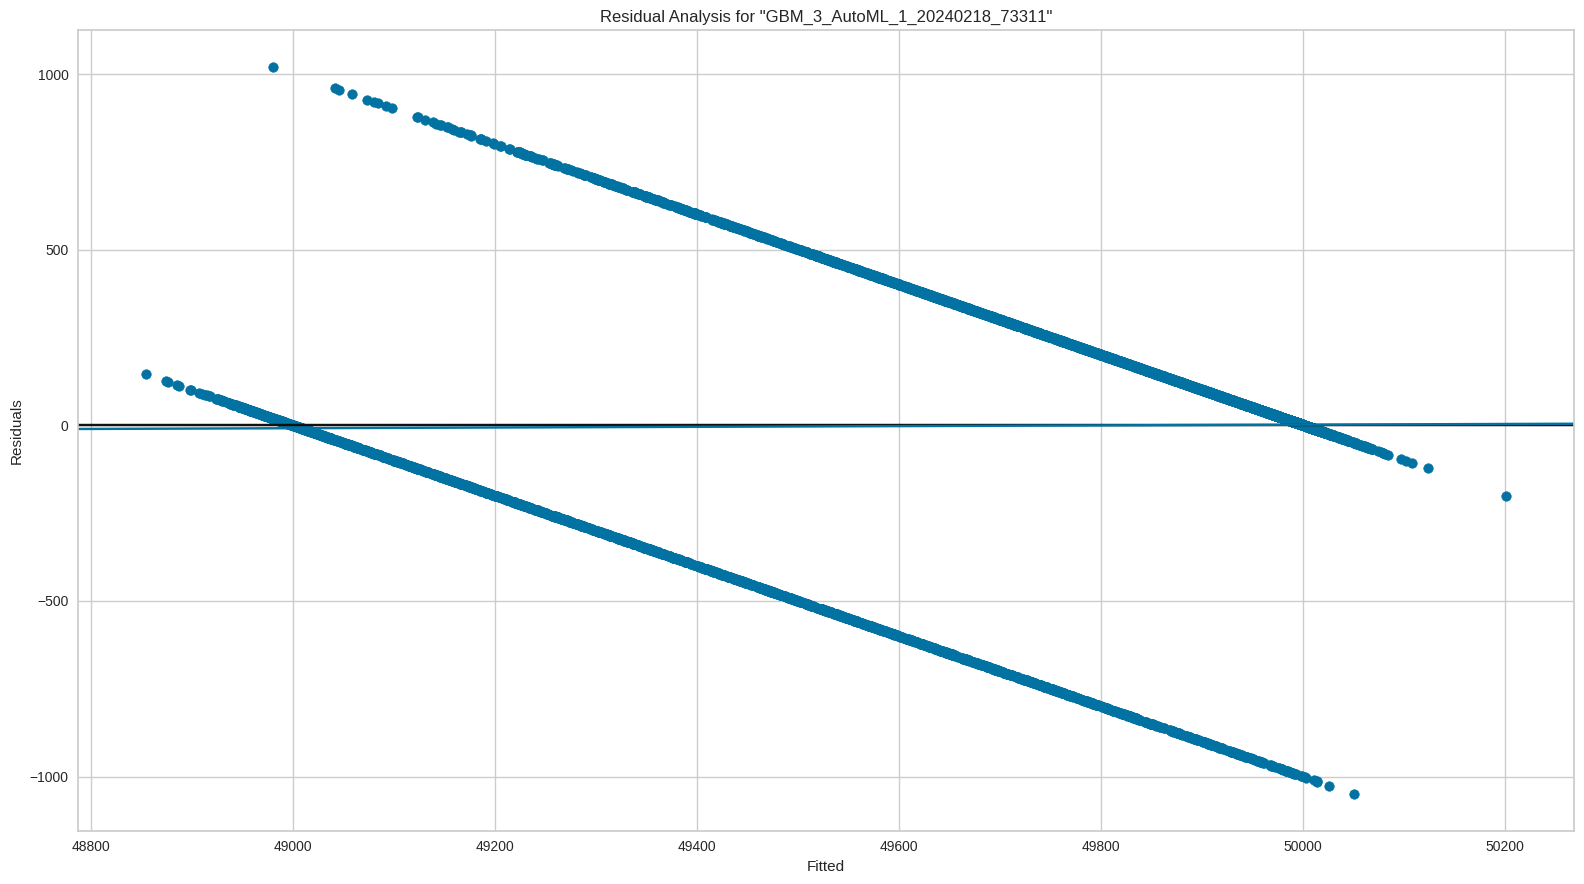

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

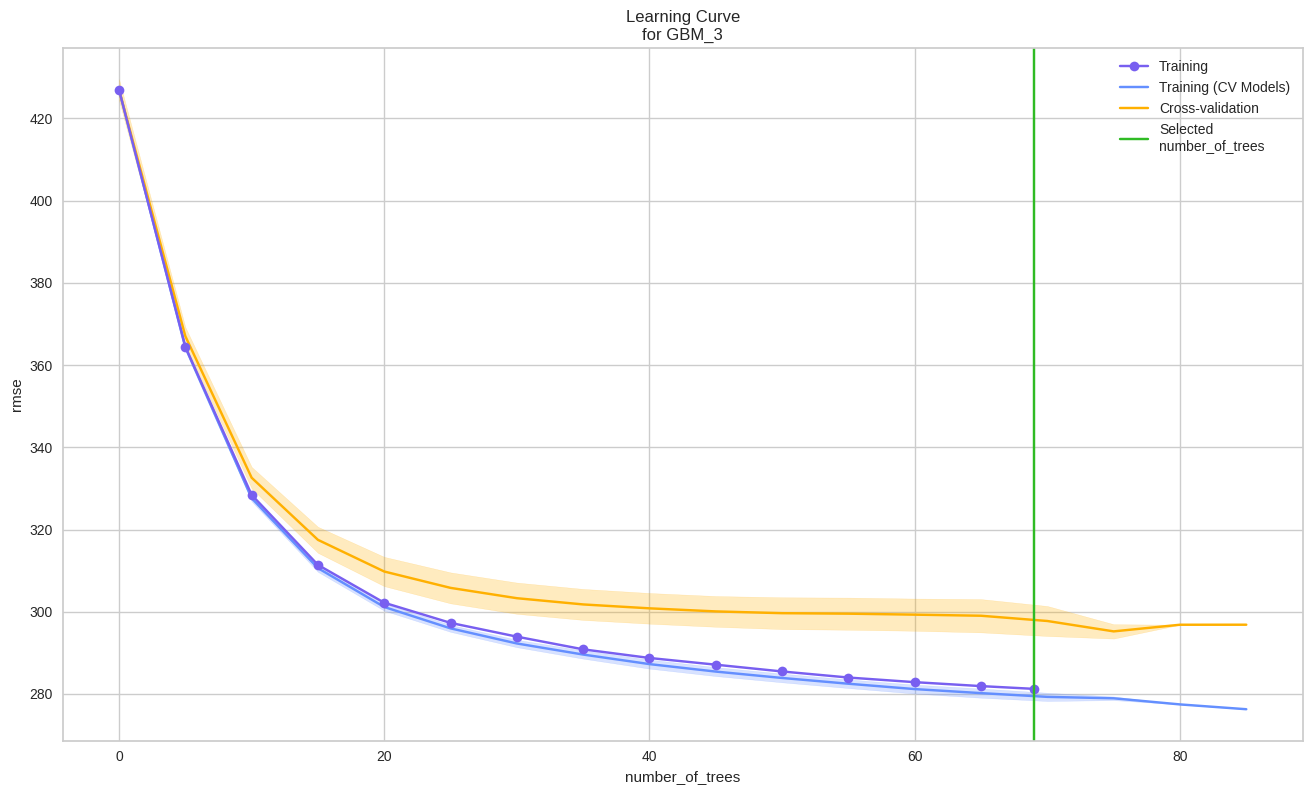

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

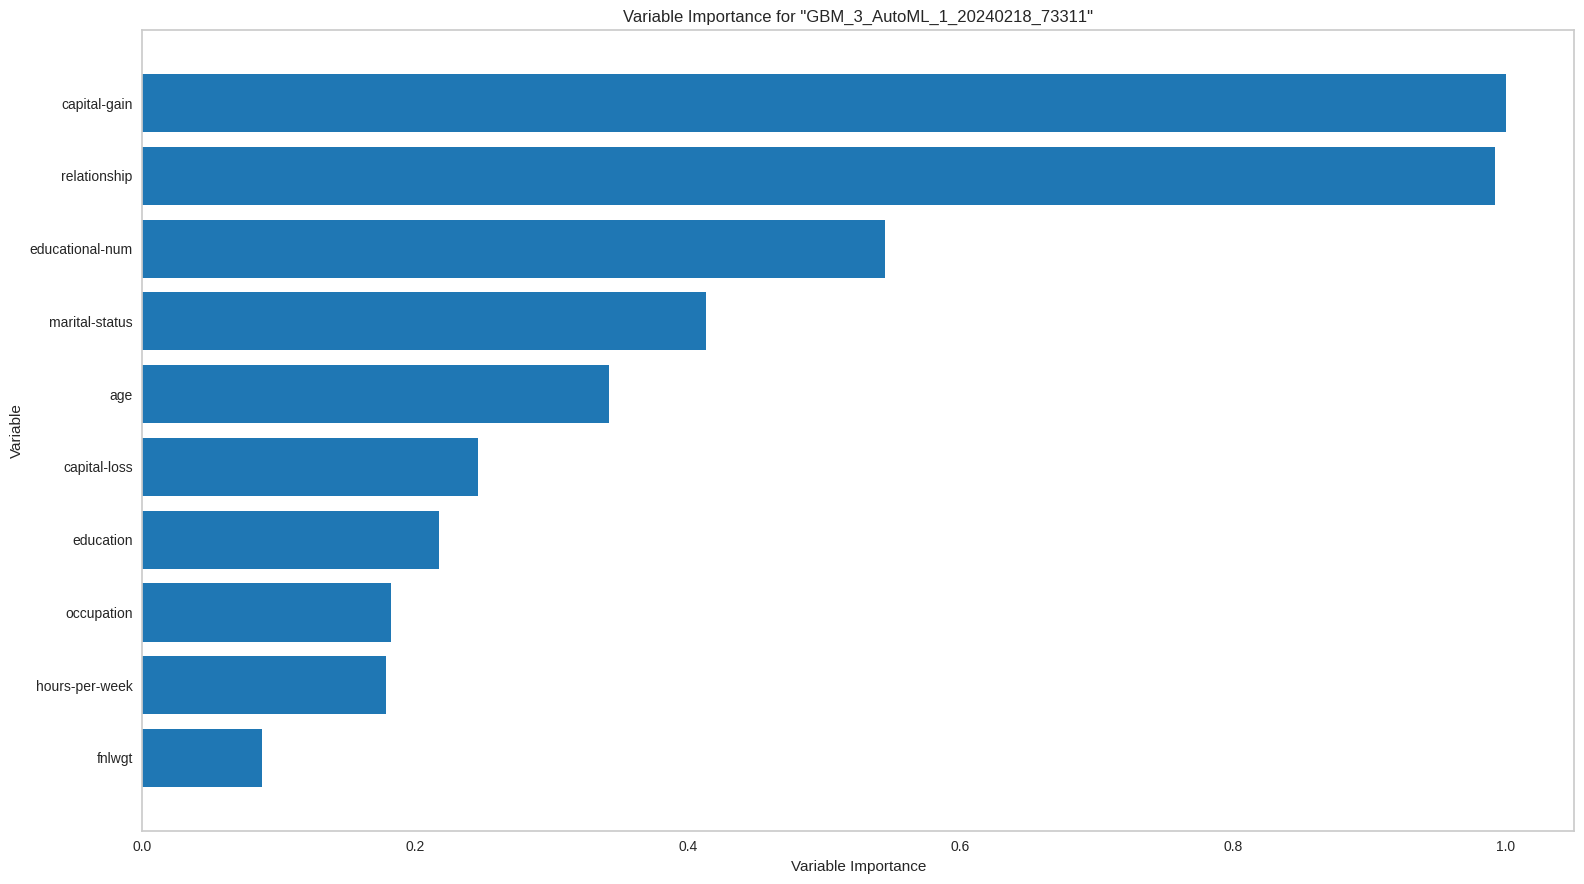

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

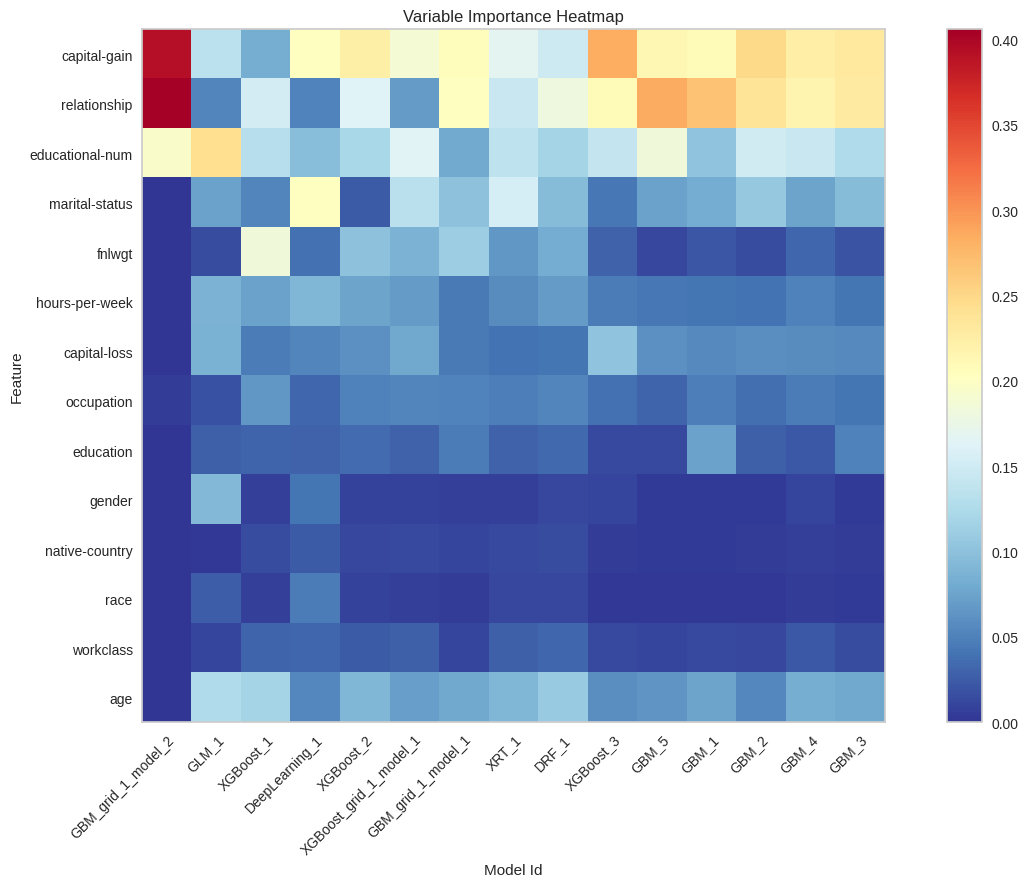

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

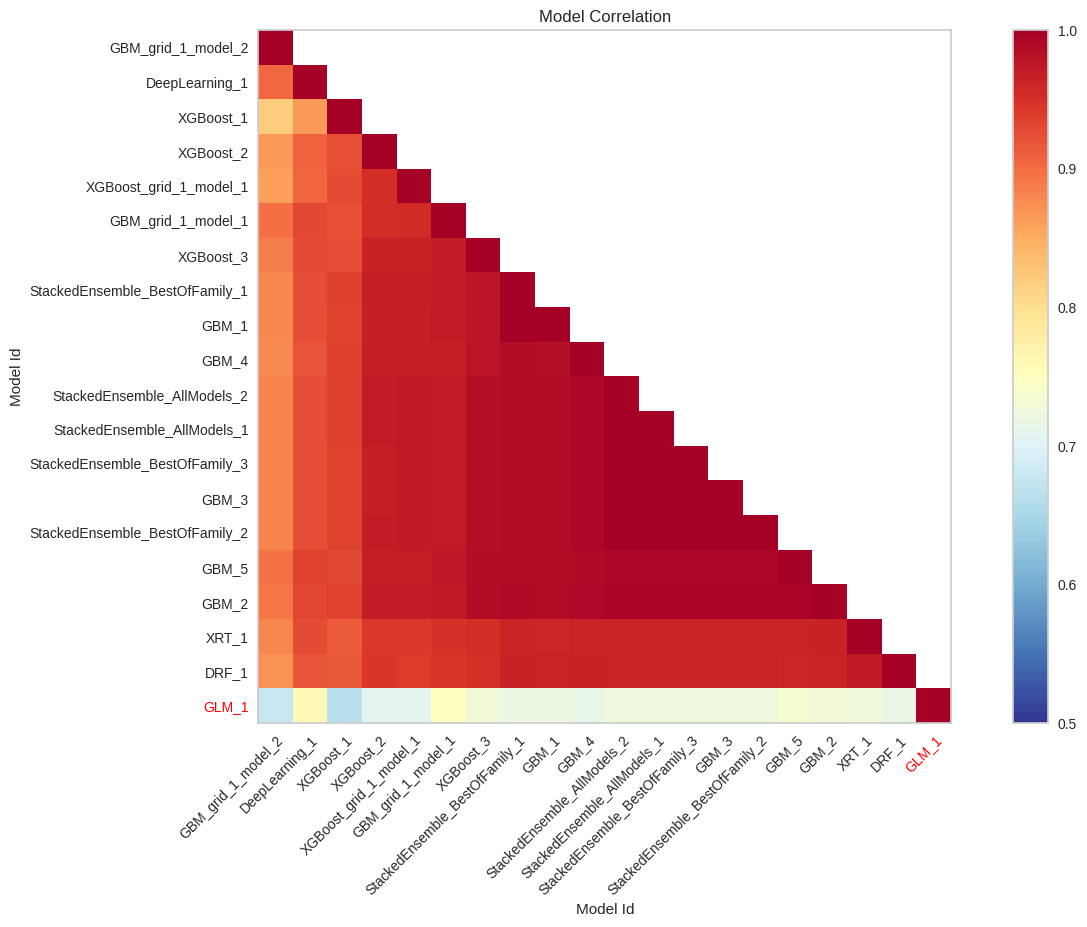

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

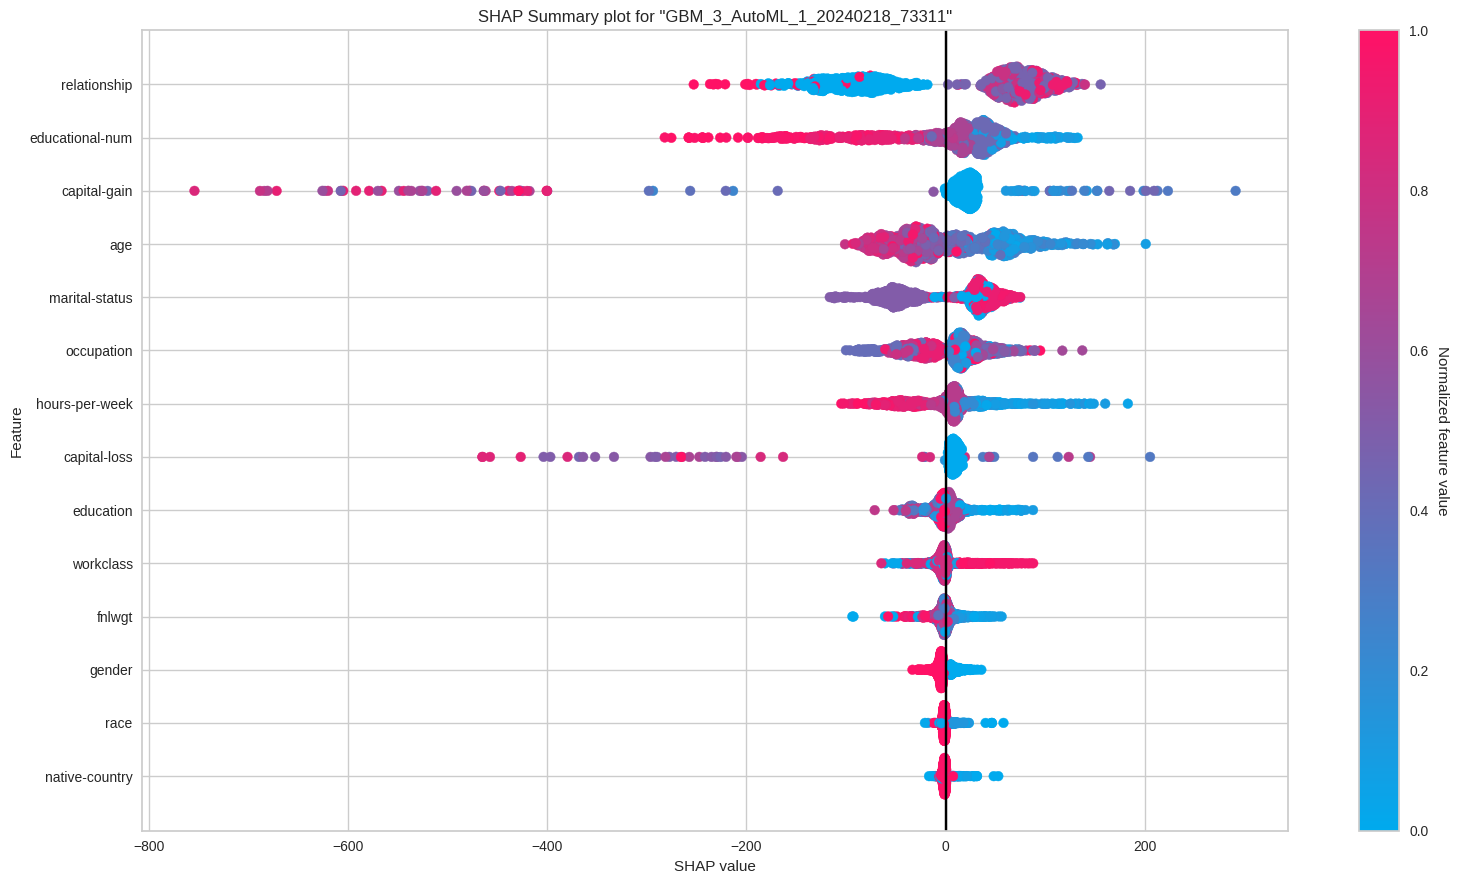

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

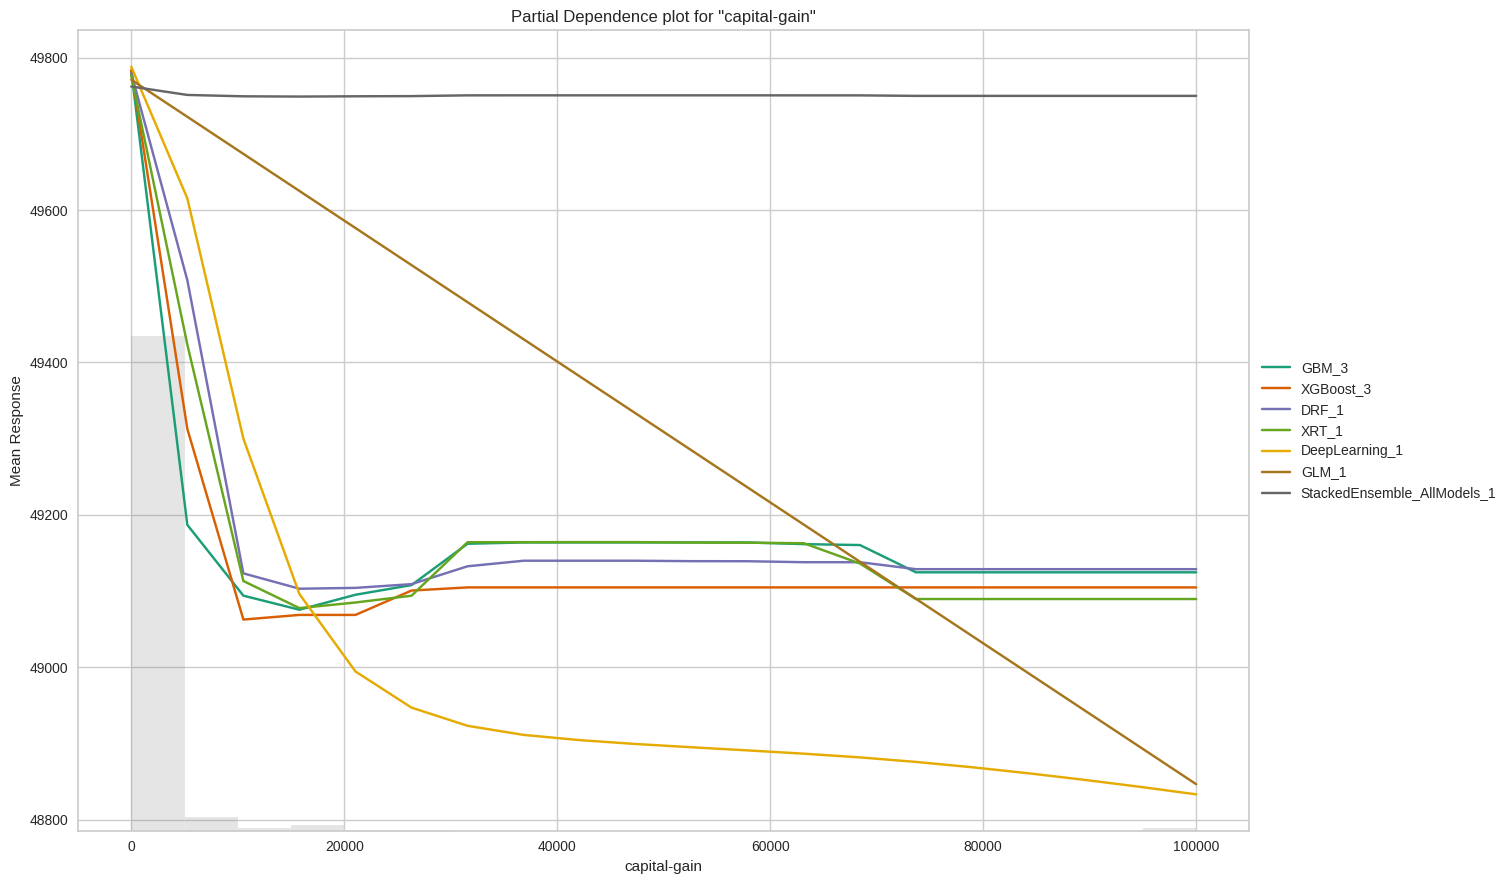

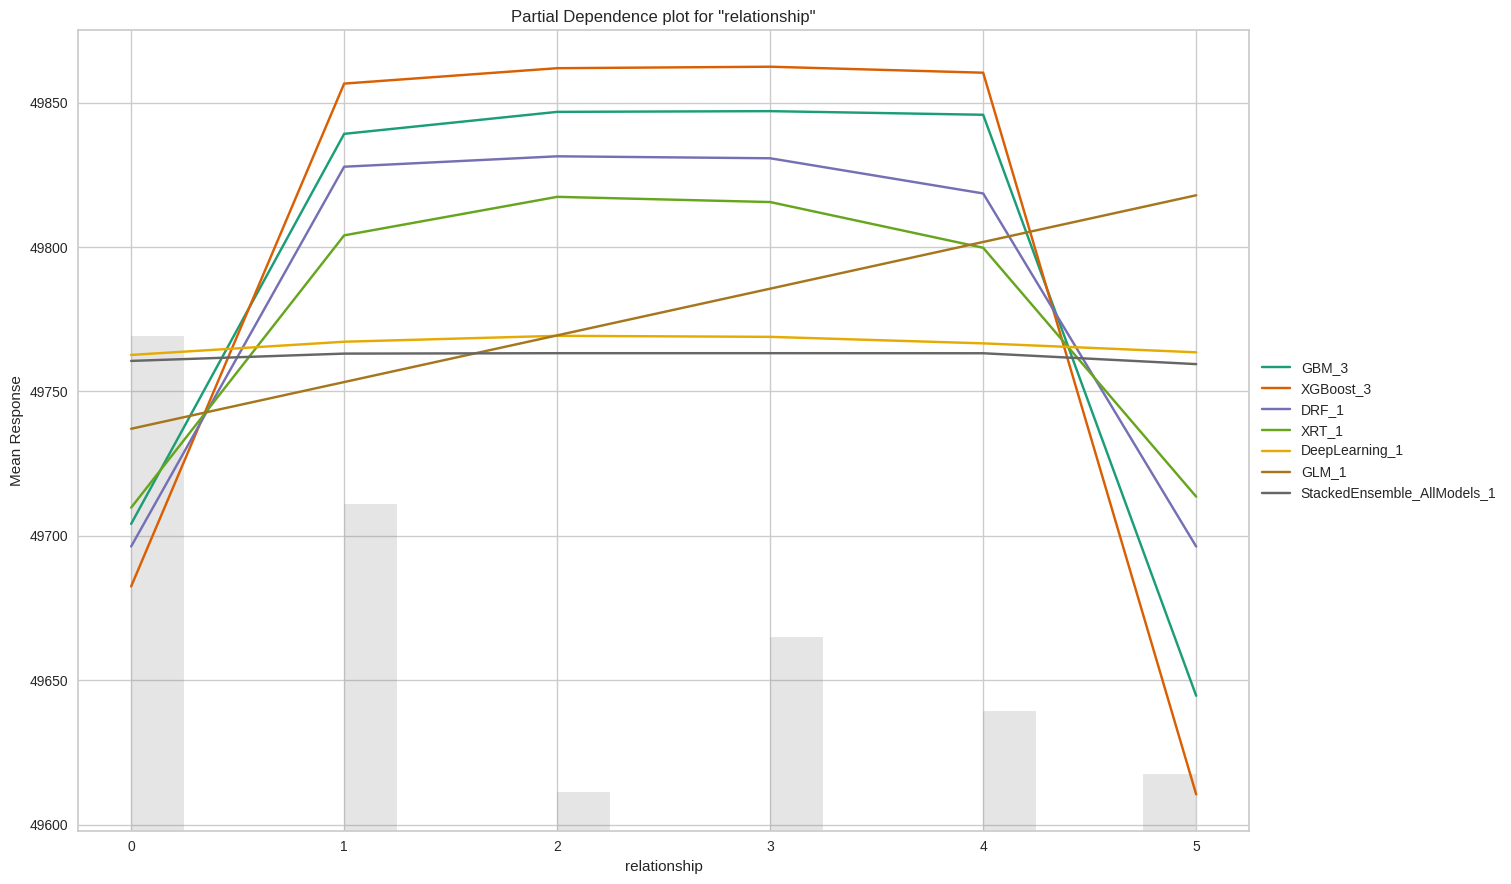

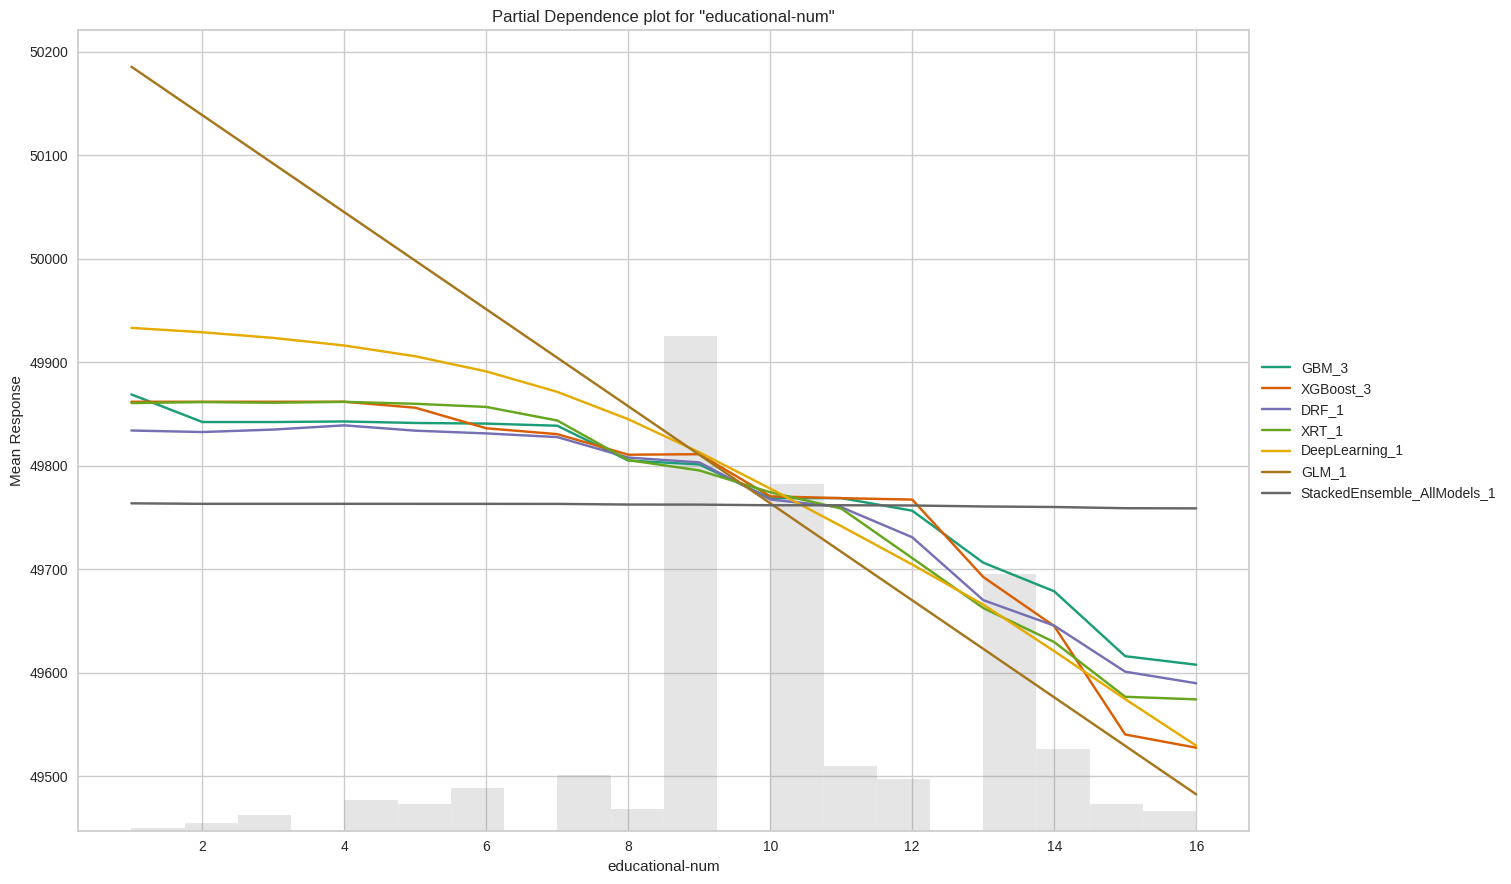

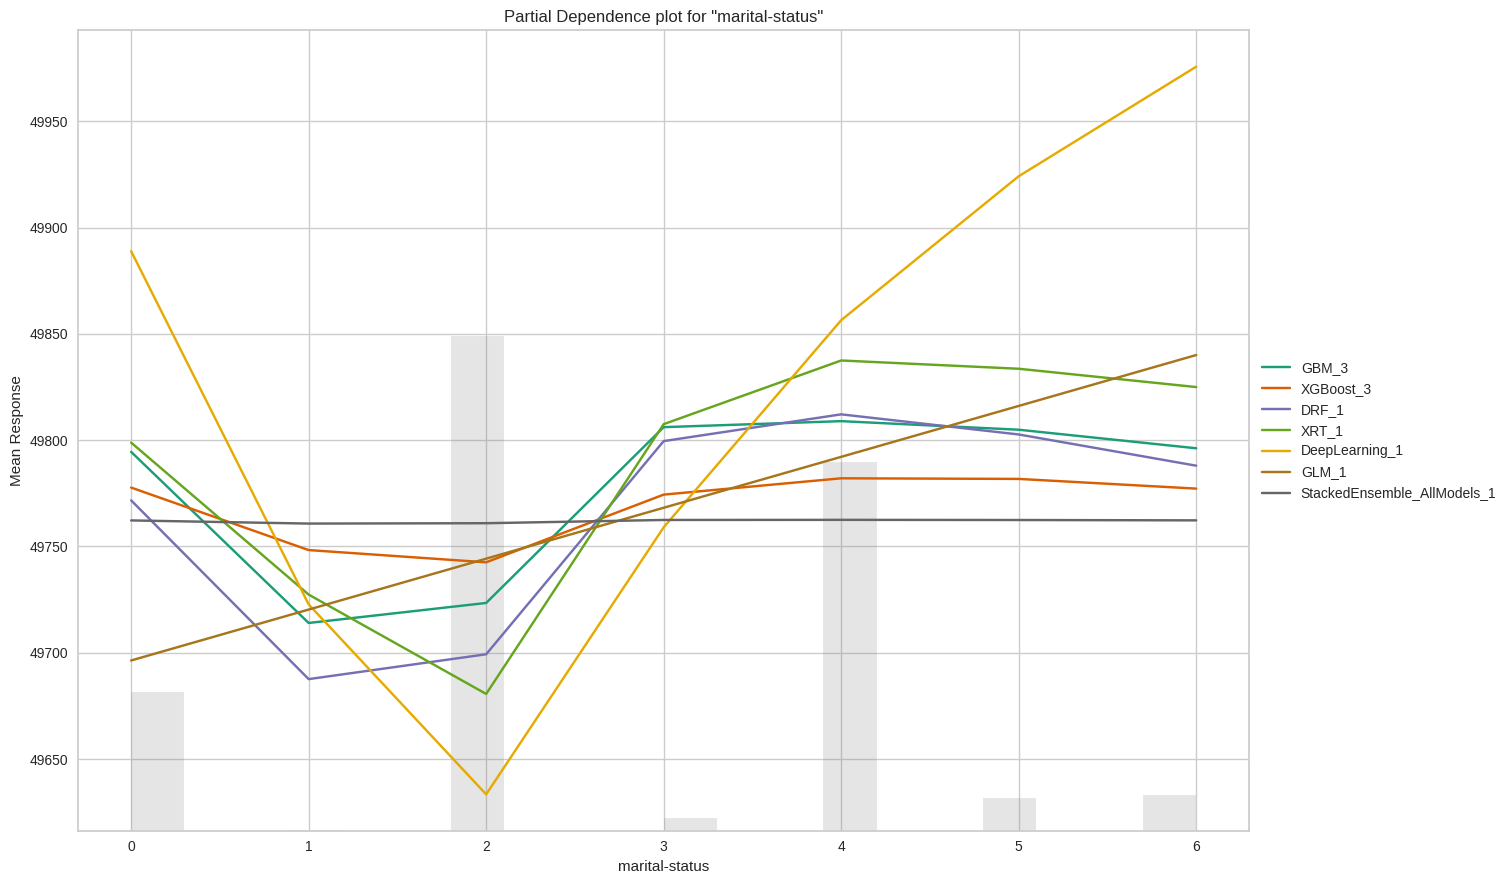

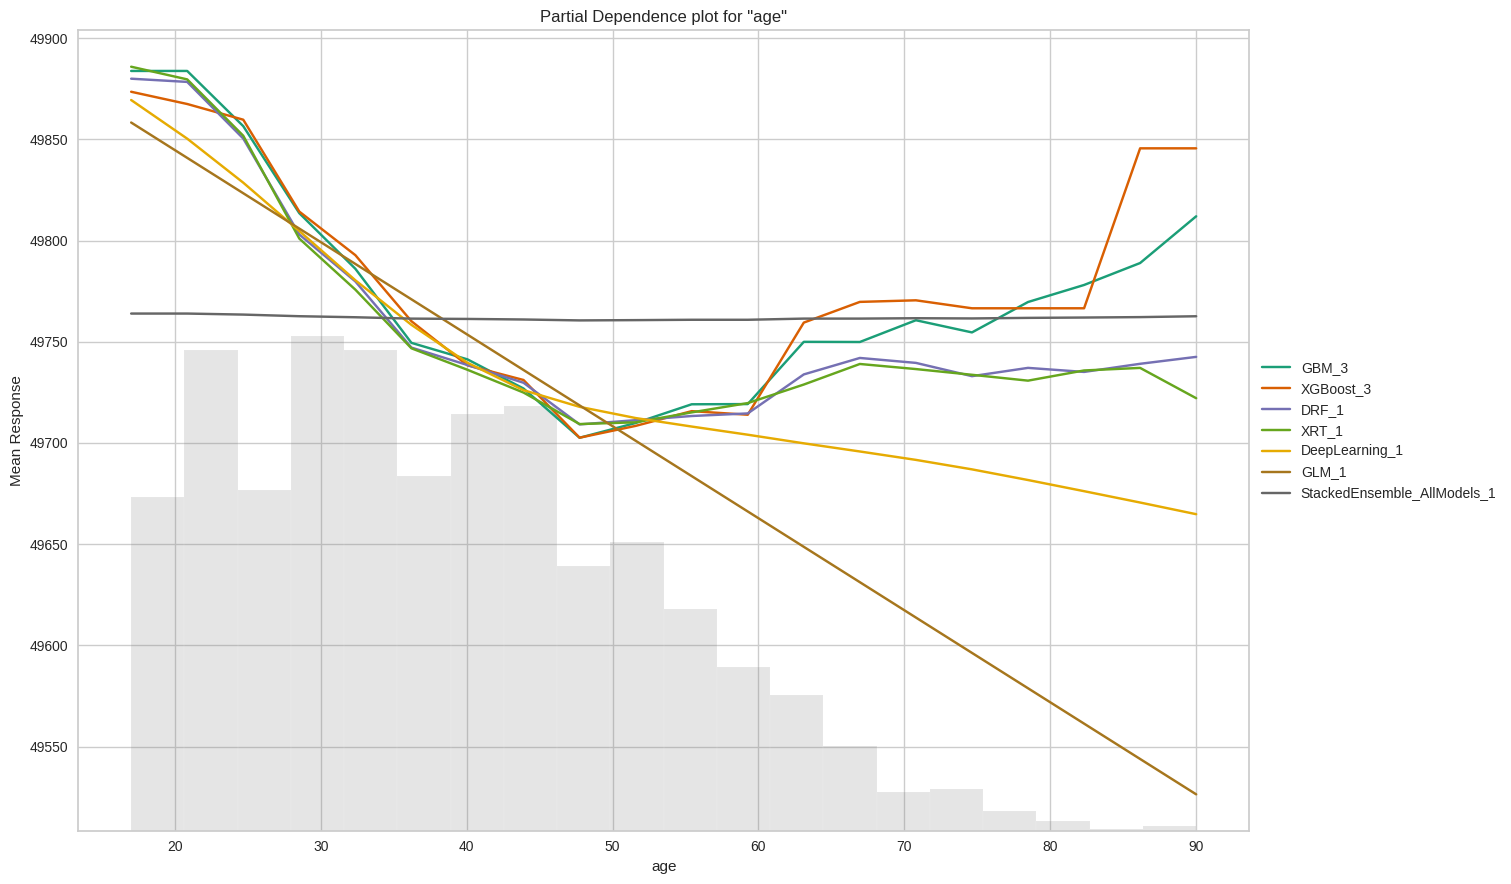

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

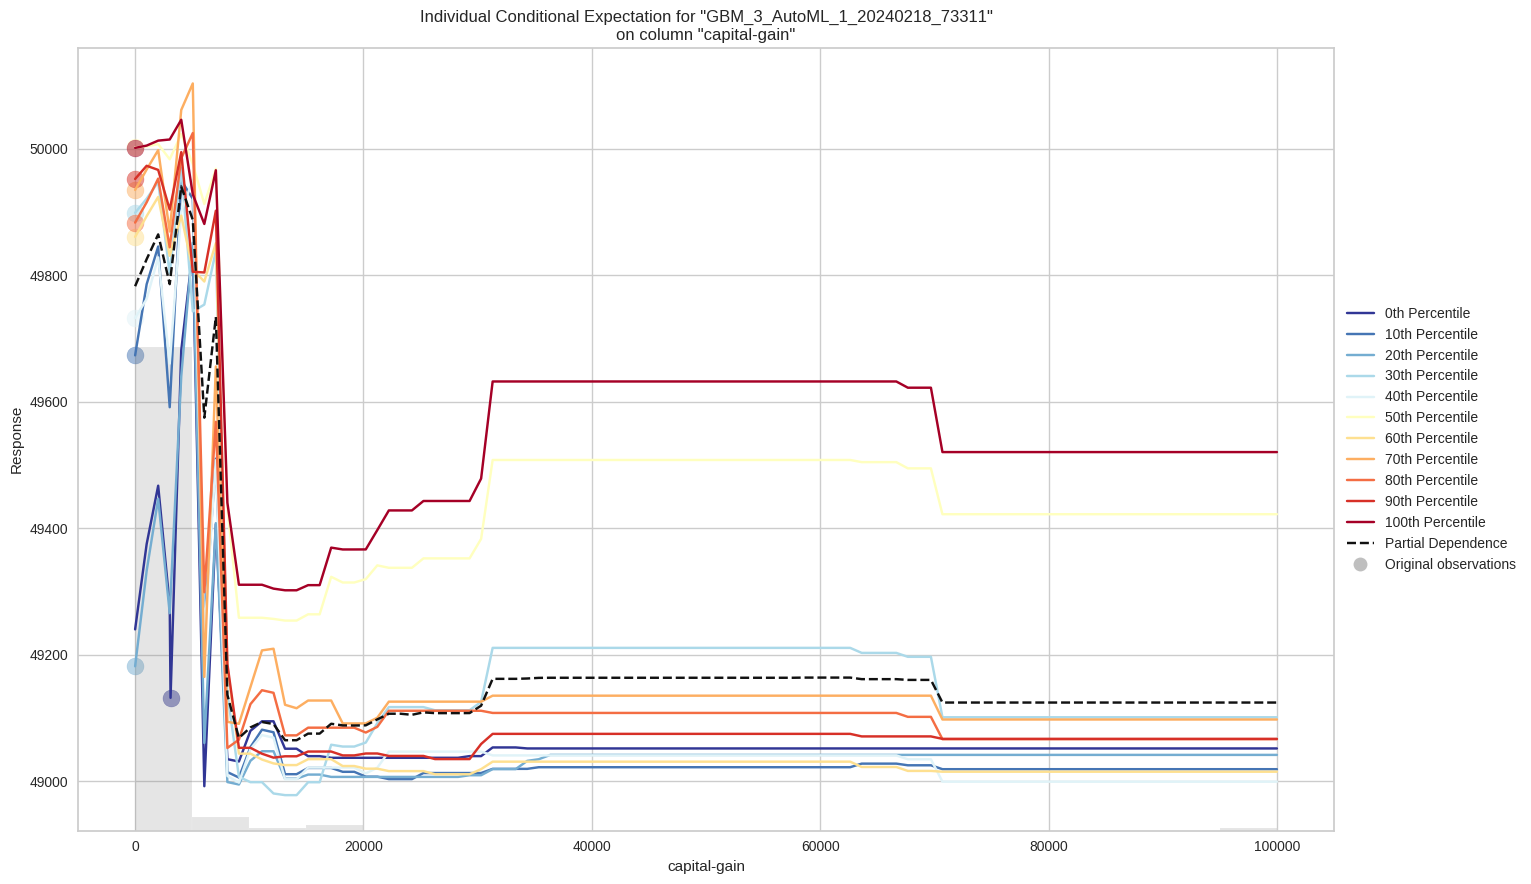

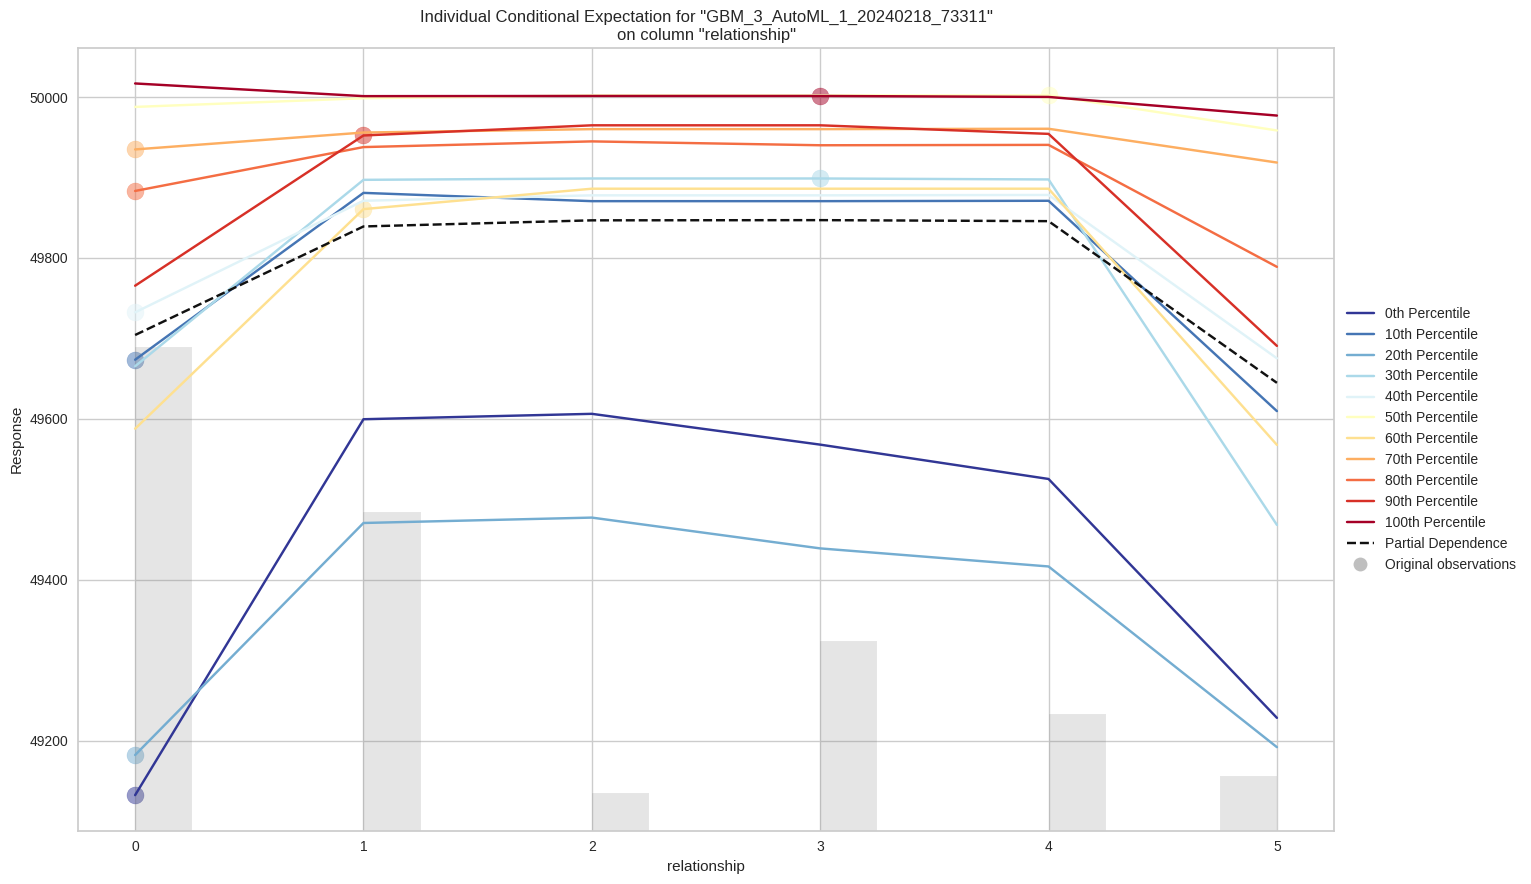

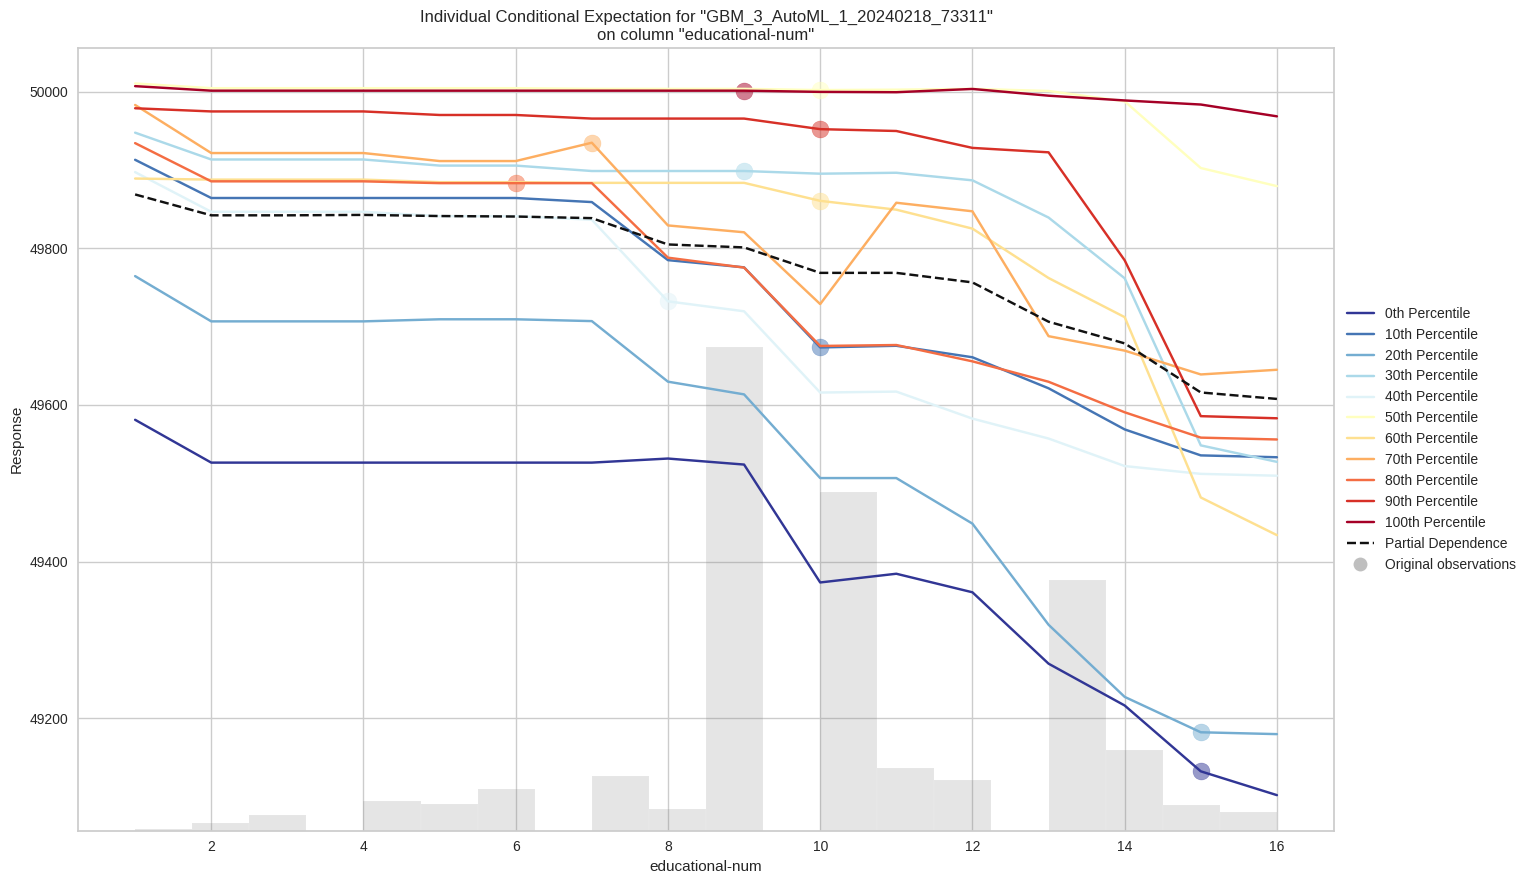

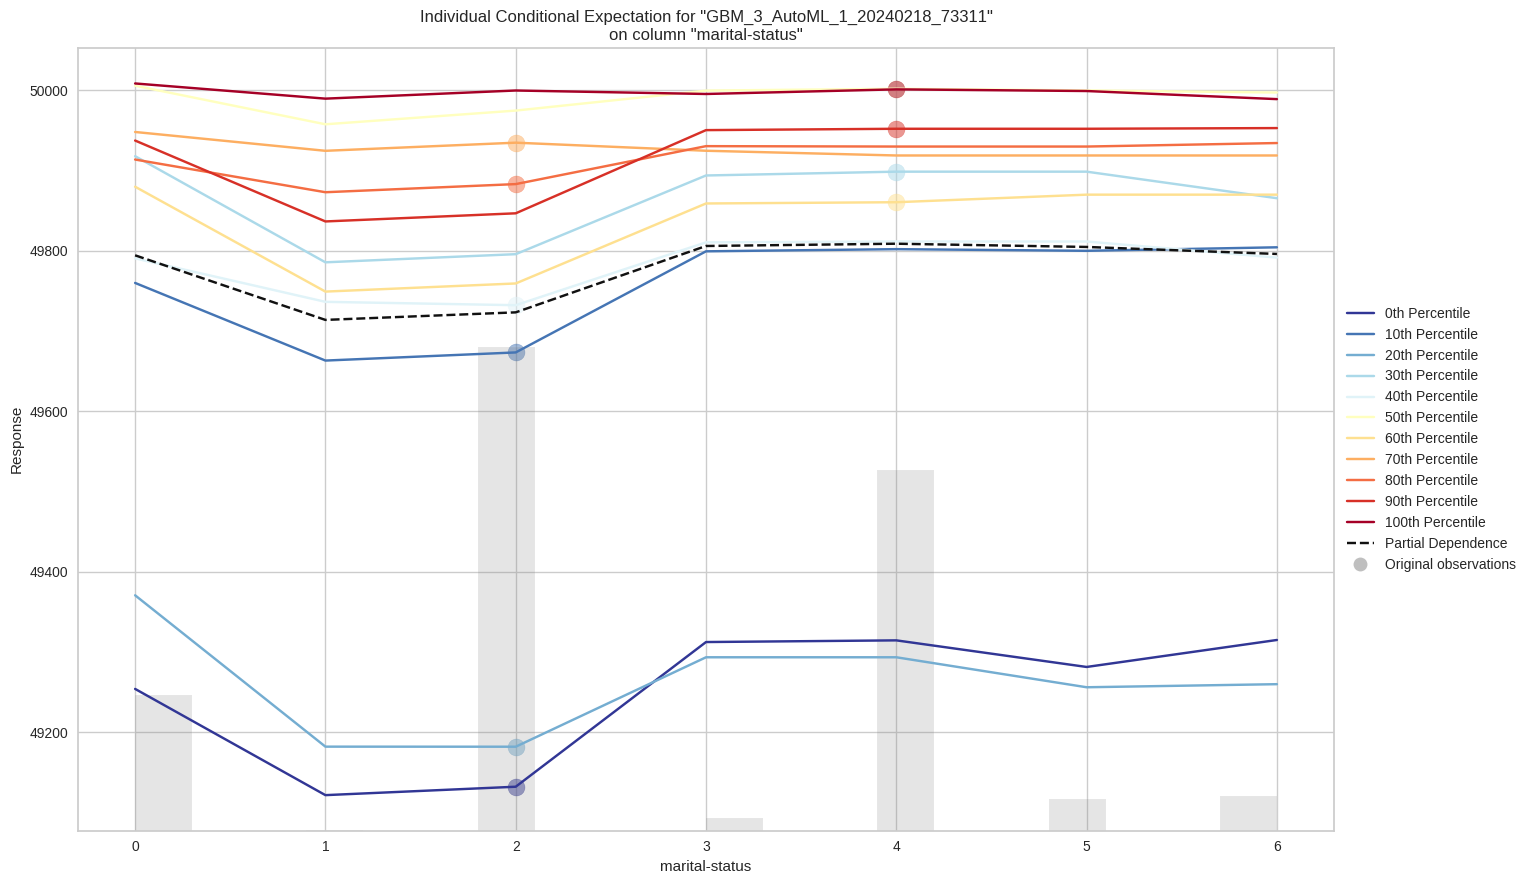

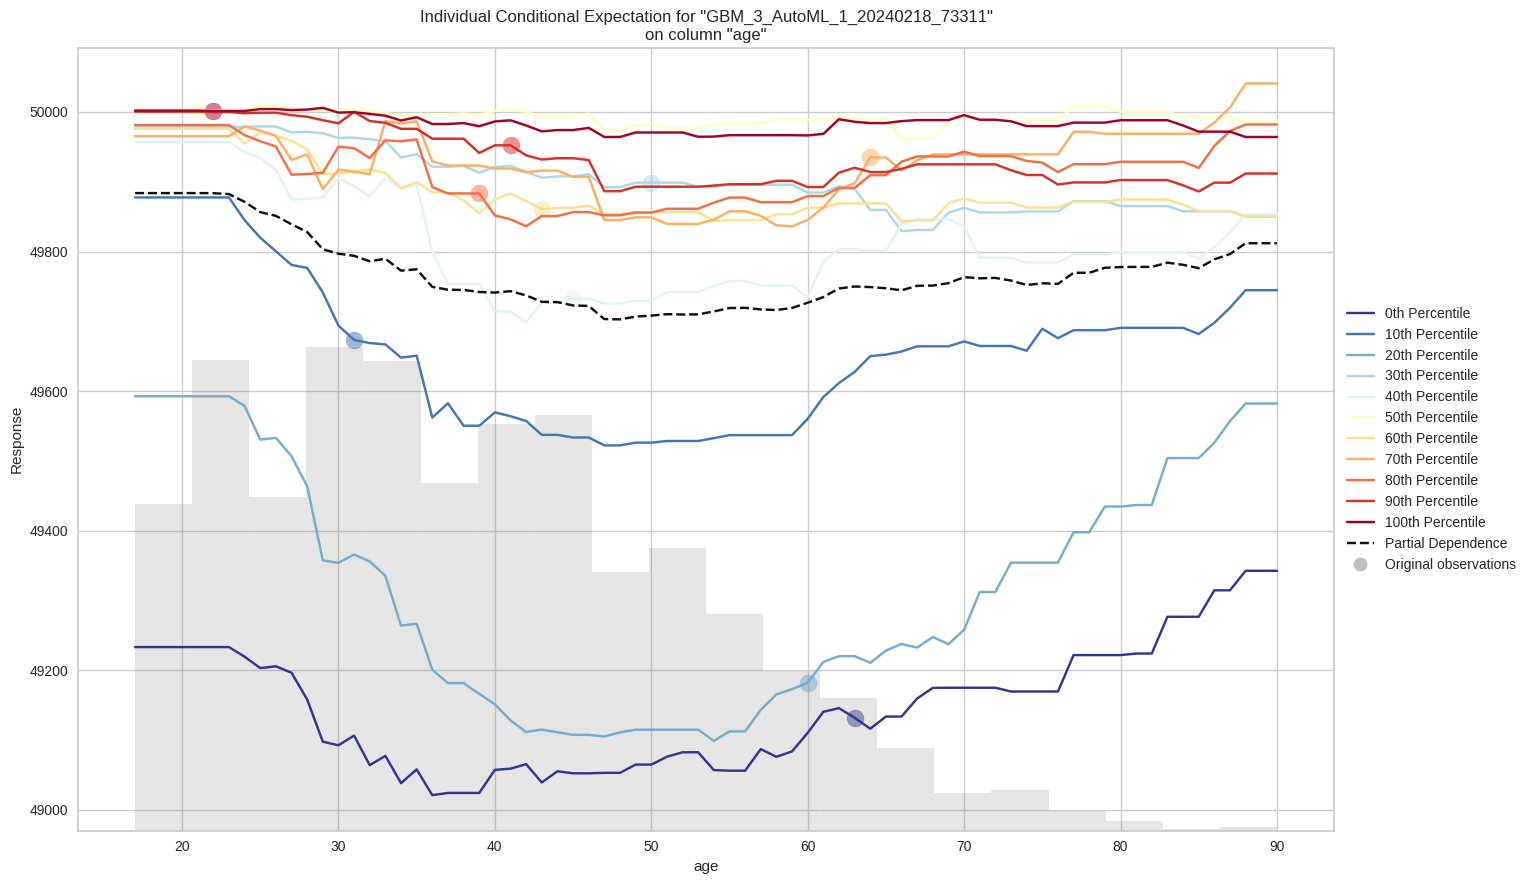

In [ ]:
exa = aml.explain(df_test)

Interpreting Regression Co-efficients
Model Co-efficients

The positive or negative value of a co-eficient tells us if there is a positve or a negtive correlationship between the target and predictors. A positive value indicates that the value of target increases if the value of co-efficient increases and vice-versa. Whereas the negative values indicates that the value of target increases if the value of co-efficient decreases and vice versa.

High absolute values of co-efficients can be used to get an idea of the importance of variables in a linear regression. Here, as stated above Alcohol and Sulphates seems to be the most important variables to predict target i.e. Quality of Wine.

Also, it signifies that Higher the qualtity of Alcohol and sulphates - better is the quality of Wine.

P-Values

If the p-value is 0.05 or lower, the result is trumpeted as significant, but if it is higher than 0.05, the result is non-significant

volatile_acidity
chlorides
total_sulfur_dioxide
alcohol
sulphate
These variables have P-Value less that 0.05, hence it can be interpreted that these variables are significant variables and any change to this variables have significant impact on the target (Wine Quality).

Skew and Kurtosis

Skewness tells us the amount and direction of skew(Departure from the central axis) and Kurtosis tells us how tall and sharp the central peak is. The optimum value for these two measures is 0, in our case we have a value for Skew and Kurtosis as -0.143, 3.717 respectively.

Durbin-Watson

The Durbin-Watson test is a statistical test to detect auto-correlation in the residuals of a regression analysis. Its range is 0 to 4.

Value of 2 indicates that no auto correlation is detected
Value between 0 to 2 indicates that there is positive auto correlation detected
Value between 2 to 4 indicates that there is negatibe auto correlation detected
Our model has a DW score of 1.780 which could be interpreted as a positive auto-correlation in the residuals of regression.

Jarque-Bera Test

The JB test is known as the test of Normality, irrespective if the data has skew or kurtosis. If it is far from zero, it signals the data do not have a normal distribution. Our JB value is 28.421 which again re-inforces the interpretation we got from Skew and Kurtosis.

Hyperparameter Tuning - Random Grid Search on GBM Model

In [ ]:
train, validate, test = np.split(
    ddf.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [ ]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [ ]:
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [ ]:

gbm_grid2.train(
    x=X, y=y, training_frame=train, validation_frame=validate, ntrees=100, seed=1
)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  -------------------  ------------  -----------  ------------------  ------------------  -------------------
     0.5                  0.1           9.0          1.0                 gbm_grid2_model_7   91232.43615409265
     0.5                  0.05          7.0          0.9                 gbm_grid2_model_2   91234.91754436494
     0.8                  0.06          9.0          0.6000000000000001  gbm_grid2_model_30  91262.68945190603
     0.9                  0.09          8.0          0.9                 gbm_grid2_model_36  91417.71961490657
     0.4                  0.08          6.0          0.9                 gbm_grid2_model_28  91708.77380921363
     0.8                  0.03          9.0          0.9                 gbm_grid2_model_8   92070.03105399373
     0.9                  0.03          10.0         0.5                 gbm_grid2_model_21  92137.21780527844
     0.9                  0.09          9.0          0.6000000000000001  gbm_grid2_model_3   92355.61919303125
     0.9                  0.1           4.0          0.7000000000000001  gbm_grid2_model_15  92726.82517642813
     0.7000000000000001   0.06          5.0          0.6000000000000001  gbm_grid2_model_14  92777.3548583393
---  ---                  ---           ---          ---                 ---                 ---
     0.5                  0.05          2.0          0.8                 gbm_grid2_model_27  104301.86067488826
     0.8                  0.04          2.0          0.9                 gbm_grid2_model_4   104957.37266037505
     0.1                  0.02          9.0          0.8                 gbm_grid2_model_16  105037.37561038481
     0.5                  0.01          10.0         1.0                 gbm_grid2_model_24  106920.18050616125
     0.6000000000000001   0.01          9.0          0.8                 gbm_grid2_model_11  107394.19910257922
     0.5                  0.03          2.0          0.6000000000000001  gbm_grid2_model_26  108843.83380300418
     0.5                  0.02          2.0          0.9                 gbm_grid2_model_35  115666.85188402036
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid2_model_20  117315.43830329507
     1.0                  0.01          2.0          0.5                 gbm_grid2_model_23  129412.4508665713
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid2_model_10  129454.07930158325
[36 rows x 7 columns]

In [ ]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)

In [ ]:
gbm_gridperf2

Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  -------------------  ------------  -----------  ------------------  ------------------  -------------------
     0.5                  0.1           9.0          1.0                 gbm_grid2_model_7   91232.43615409265
     0.5                  0.05          7.0          0.9                 gbm_grid2_model_2   91234.91754436494
     0.8                  0.06          9.0          0.6000000000000001  gbm_grid2_model_30  91262.68945190603
     0.9                  0.09          8.0          0.9                 gbm_grid2_model_36  91417.71961490657
     0.4                  0.08          6.0          0.9                 gbm_grid2_model_28  91708.77380921363
     0.8                  0.03          9.0          0.9                 gbm_grid2_model_8   92070.03105399373
     0.9                  0.03          10.0         0.5                 gbm_grid2_model_21  92137.21780527844
     0.9                  0.09          9.0          0.6000000000000001  gbm_grid2_model_3   92355.61919303125
     0.9                  0.1           4.0          0.7000000000000001  gbm_grid2_model_15  92726.82517642813
     0.7000000000000001   0.06          5.0          0.6000000000000001  gbm_grid2_model_14  92777.3548583393
---  ---                  ---           ---          ---                 ---                 ---
     0.5                  0.05          2.0          0.8                 gbm_grid2_model_27  104301.86067488826
     0.8                  0.04          2.0          0.9                 gbm_grid2_model_4   104957.37266037505
     0.1                  0.02          9.0          0.8                 gbm_grid2_model_16  105037.37561038481
     0.5                  0.01          10.0         1.0                 gbm_grid2_model_24  106920.18050616125
     0.6000000000000001   0.01          9.0          0.8                 gbm_grid2_model_11  107394.19910257922
     0.5                  0.03          2.0          0.6000000000000001  gbm_grid2_model_26  108843.83380300418
     0.5                  0.02          2.0          0.9                 gbm_grid2_model_35  115666.85188402036
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid2_model_20  117315.43830329507
     1.0                  0.01          2.0          0.5                 gbm_grid2_model_23  129412.4508665713
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid2_model_10  129454.07930158325
[36 rows x 7 columns]

In [ ]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [ ]:
models = gbm_gridperf2.models

In [ ]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [ ]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [ ]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)

In [ ]:
print(hyperparameters_dataframe)

    col_sample_rate  learn_rate  max_depth  sample_rate  Residual_Deviance
0               0.5        0.10          9          1.0       91232.436154
1               0.5        0.05          7          0.9       91234.917544
2               0.8        0.06          9          0.6       91262.689452
3               0.9        0.09          8          0.9       91417.719615
4               0.4        0.08          6          0.9       91708.773809
5               0.8        0.03          9          0.9       92070.031054
6               0.9        0.03         10          0.5       92137.217805
7               0.9        0.09          9          0.6       92355.619193
8               0.9        0.10          4          0.7       92726.825176
9               0.7        0.06          5          0.6       92777.354858
10              0.3        0.03          8          1.0       93827.882945
11              0.5        0.10          4          0.8       93976.911307
12              0.6      

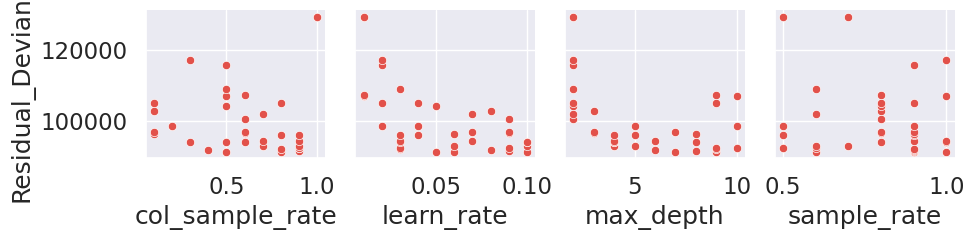

In [ ]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

**Conclusion**

A fundamental algorithm based on the linear regression method to predict housing prices was constructed. VIF, p-values and other tests were considered to ignore some of the independent variables. H20.ai framework was used to train and test the variables of the dataset of Melbourne Housing price. This gave the best model as ‘gbm’ and accuracy for test data was 89.9%. From the results shown it can be concluded that the proposed linear regression model can effectively analyze and predict the housing price to some extent. Admittedly, the prediction accuracy is still limited at specific points, and the model still needs to be improved in further research. In further research into the corresponding models, different techniques like removing outliers and using ensemble or booster can help achieve better prediction.

**Assignment Question/Answers**

Q1) Is the relationship significant?

A relationship is said to be statistically significant when the p value for the variables is less than 0.05.P value is probability of obtaining a result at least as extreme as the current one, assuming null hypothesis is true. A small p value depicts that there is very little similarity between the two groups and hence null hypothesis can be ignored. P-value was calculated by two ways for this model. From the OLS method  it can be concluded that p-value for all the variables of dataset is less than 0.05. Hence for the chosen dataset it can be concluded that the relationship is significant.

Q2) Are any model assumptions violated?

Assumptions for linear regression are:
Linear relationship- The graph for dependent and independent variable needs to be linear by keeping other variables constant. When target variable is plotted against all other independent variables, linear relation is observed for few of them. Hence this assumption is not violated.
Homoscedasticity which means normality of the error distribution - The plot for residuals should be normally distributed i.e., it should form a bell-curve shape. For this model the same is achieved.
No or little multicollinearity-This can be determined by correlation matrix. For this model some of the assumptions are violated. Multicollinearity exists between variables Rooms and BuildingArea.
No autocorrelation can be determined with Durbin-Watson test. Values between 1.5 to 2.5 signifies no autocorrelation. For this model the value is 1.6, therefore this assumption is not violated.

Q3) Is there any multicollinearity in the model?

When one independent variable is related to another independent variable that is its highly correlated then multicollinearity exists in the model. It’s an issue as it undermines the statistical significance of an independent variable. Multicollinearity can be determined by computing correlation matrix or calculating VIF value of all variables. In correlation matrix a coefficient closer to +1 or -1 tells us that those two variables are highly correlated. For VIF values a value above 10 tells us that multicollinearity exists. In this model some variables had VIF value greater than 10 and p value was greater than 0.05.

Q4) In the multivariate models are predictor variables independent of all the other predictor variables?

Variables are said to be independent when there is no relation between them. To check this relation, correlation matrix can be used, or it can be observed from graphs too whether there is any pattern followed or not. When correlation matrix is computed for the model, it can be observed that predictors are independent from each other.

Q5)In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model. From the variable importance plot, the most to least important variables are displayed. For my model BuildingArea, Type, Latitude and Rooms are top 4 most important variables to determine Price. VIF and p-values for Address, Date, Bedroom2, YearBuilt and Longtitude was high than the ideal values. So those variables were excluded from the model.

Q6) Does the model make sense? For a model to make sense it should follow all the assumptions and have p value, VIF between their respective ranges. RMSE should be as low as possible considering the minimum and maximum values of the target variable. Other than that, R2 too is 0.76 which is considered good in terms of accuracy. So overall the model makes sense. To increase the accuracy, some additional variables can be dropped depending on their importance. Furthermore, outliers can be removed or boosting, or ensemble model can be used.

Q7)Does regularization help? Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. The main use of Regularization is to minimize the validation loss and try to improve the accuracy of the model. For this model Ridge Regularization was used on training data. It was observed that Root Mean Square Error (RMSE) and R2 was calculated twice, once when regularization was not applied and once when regularization was applied. The values were same in both the cases. Hence it can be concluded that for this model regularization does not help.

Q8) Which independent variables are significant? Variables are significant when p-value is less than 0.05. For this model all variables have p-value less than 0.05. So, it can be said that all variables are significant.

Q9) Which hyperparameters are important? To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset. For this model tuning is performed using RandomForestRegressor. The best hyperparameters for this model are:- 'max_depth': 500, 'min_samples_split': 2 and 'n_estimators': 100



MIT License

Copyright (c) 2024 Priyanka Shinde

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


REFERENCES

H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/

Kaggle Notebook- https://www.kaggle.com/stephaniestallworth/melbourne-housing-market-eda-and-regression

Dataset- https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

Professor's AutoML Notebook- https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML